# Анализ оттока клиентов фитнесс-клуба 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from plotly import graph_objects as go
from sklearn.metrics import silhouette_score


## Загрузка данных

### Просмотр данных

In [2]:
fitness_data=pd.read_csv('/datasets/gym_churn.csv')

In [3]:
fitness_data.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Типы данных соответствуют своим значениям. Названия колонок не соответствуют принятым стандартам, переведем их в нижний регистр

In [5]:
fitness_data.columns=fitness_data.columns.str.lower()

In [6]:
#Проверяем  наши изменения
fitness_data.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

Выводы:
    
Данные отброжаются нормально. Все данные представлены в числовом виде. Это очень удобно для расчетов. Типы данных соответствуют своим значениям. Переходим к исследовательскому анализу  

## Исследовательский анализ данных (EDA)

### Поиск пропущенных значений

In [7]:
fitness_data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропущенные значения не обнаружены

### Поиск дубликатов

In [8]:
fitness_data.duplicated().sum()

0

Дубликаты не обнаружены

### Просмотр средних значений признаков и стадартного отклонения 

In [9]:
fitness_data.describe()

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Стандартное отклонение везде меньше или примерно равно среднему значению признаков. Это говорит, о том что в данных нет  аномалий или выбросов.

### Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [10]:
fitness_data.groupby('churn').mean()


gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

Если средние значения равны, то признак не влияет на отток, и наоборот. В данном случае получается на отток не влияют признаки пол и телефон, остальные влияют.

### Столбчатые гистограммы и распределения признаков  по группам, кто ушёл (отток) и тех, кто остался 

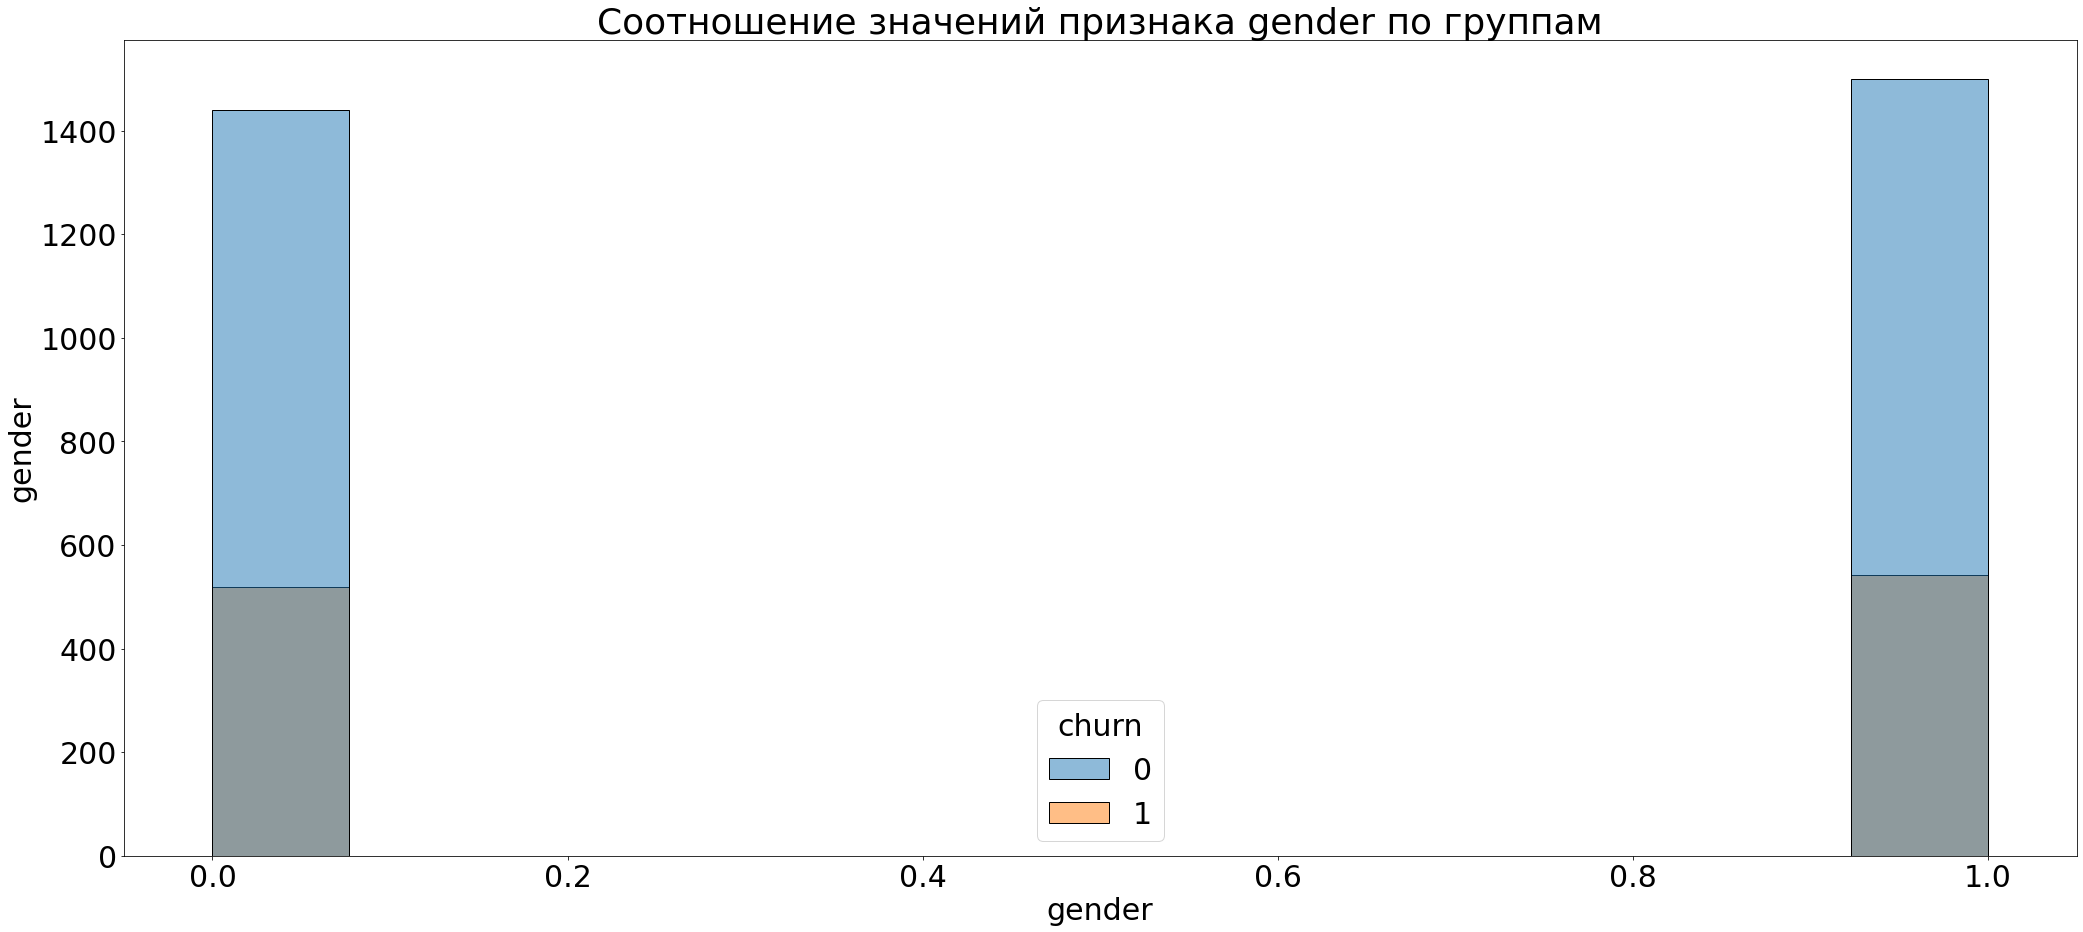

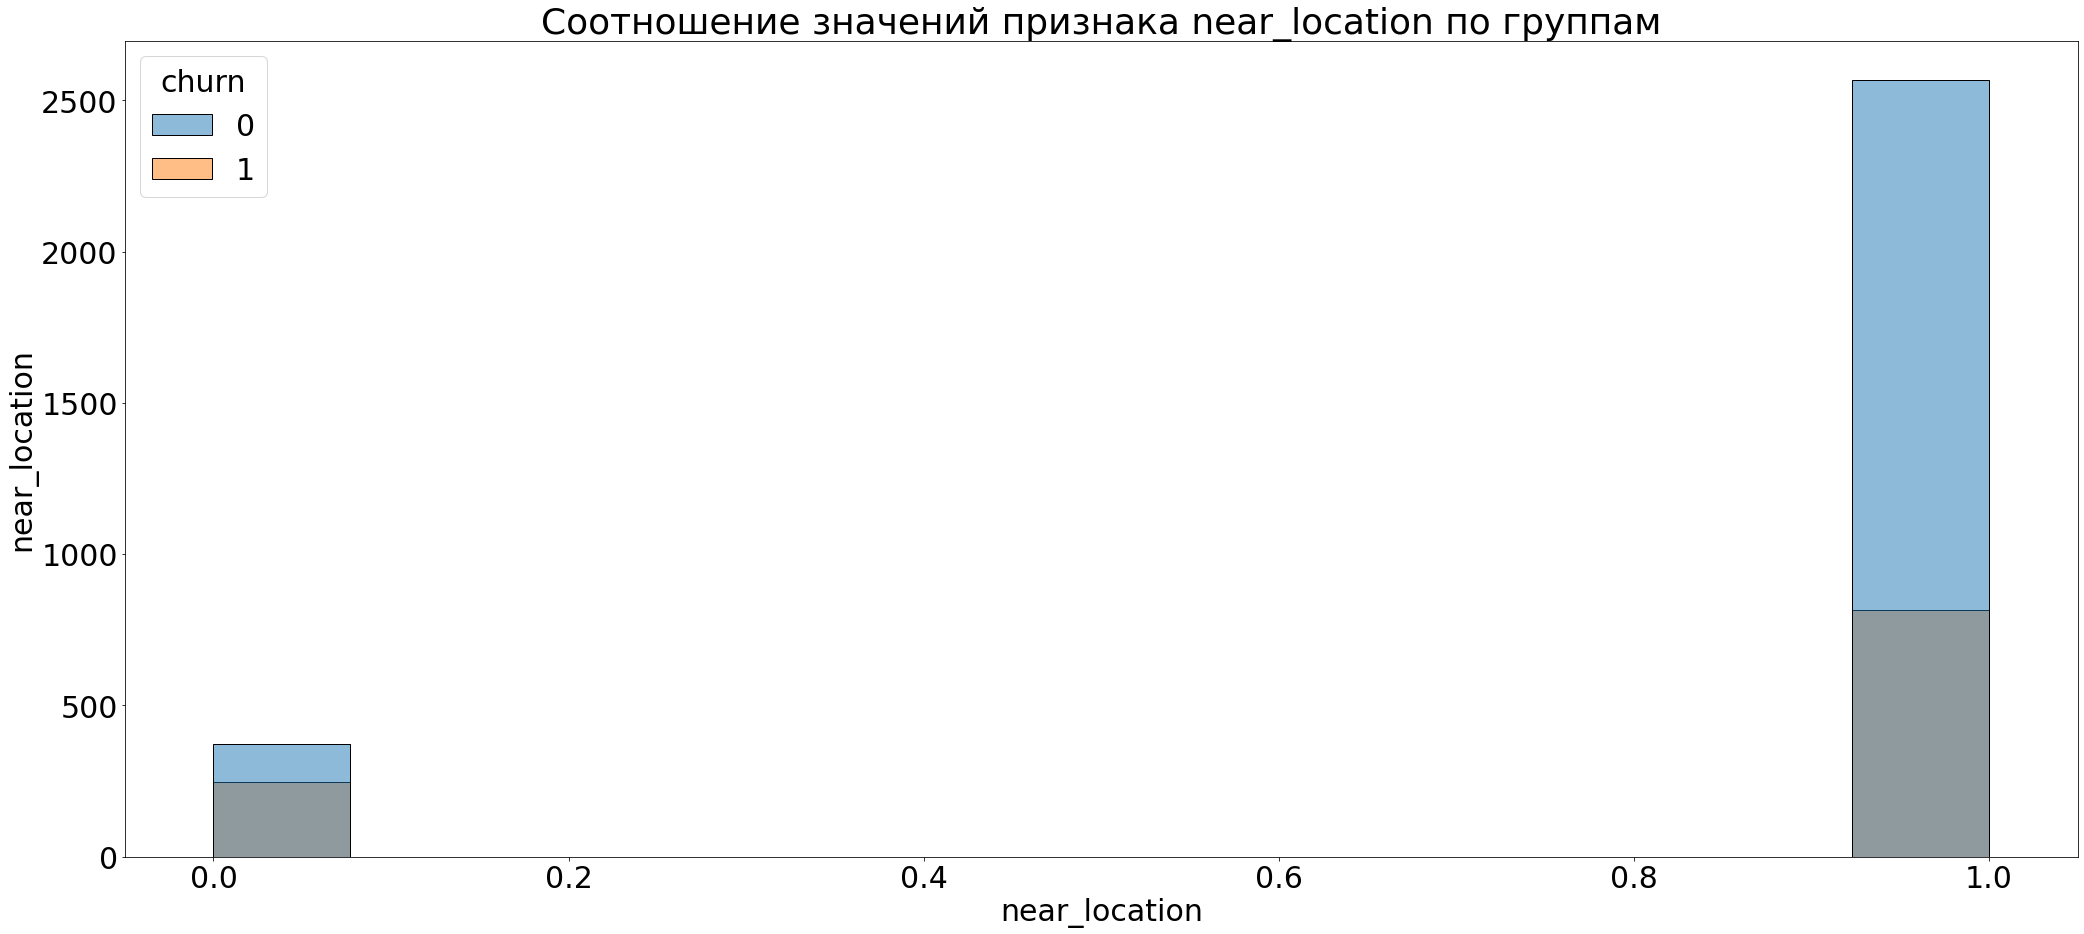

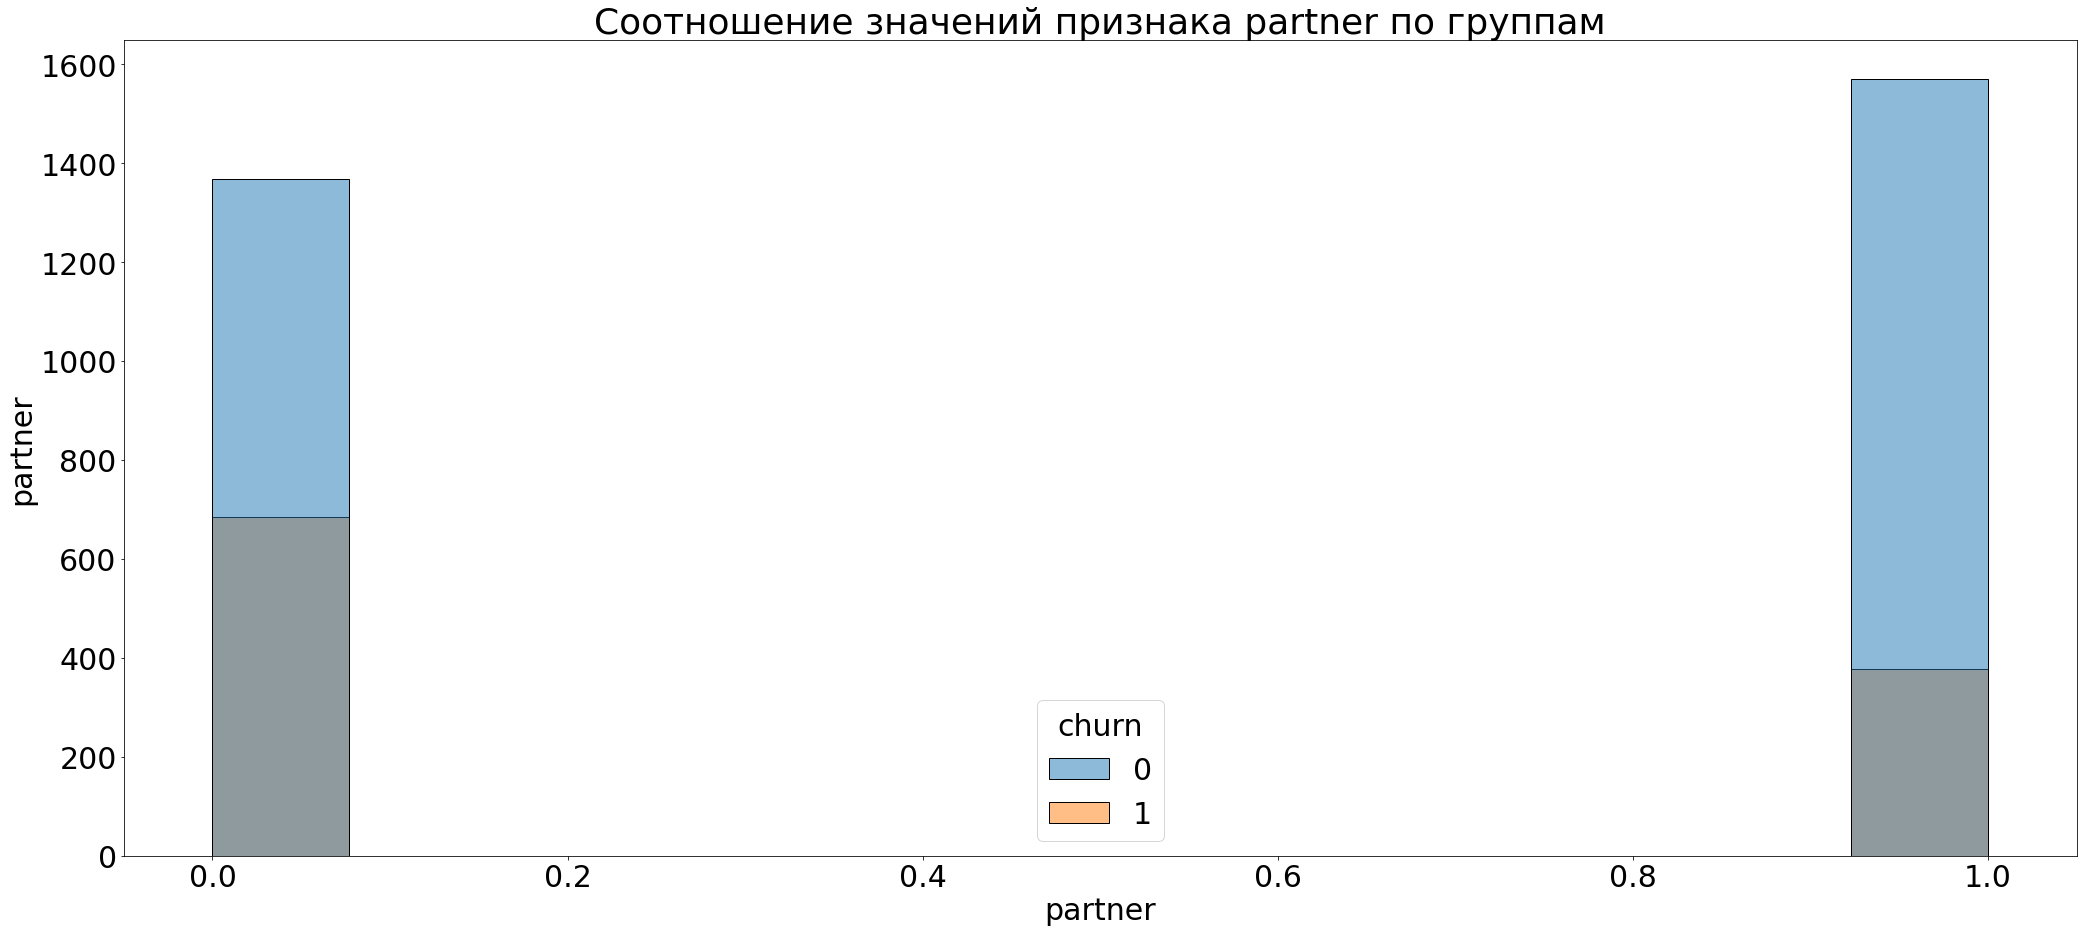

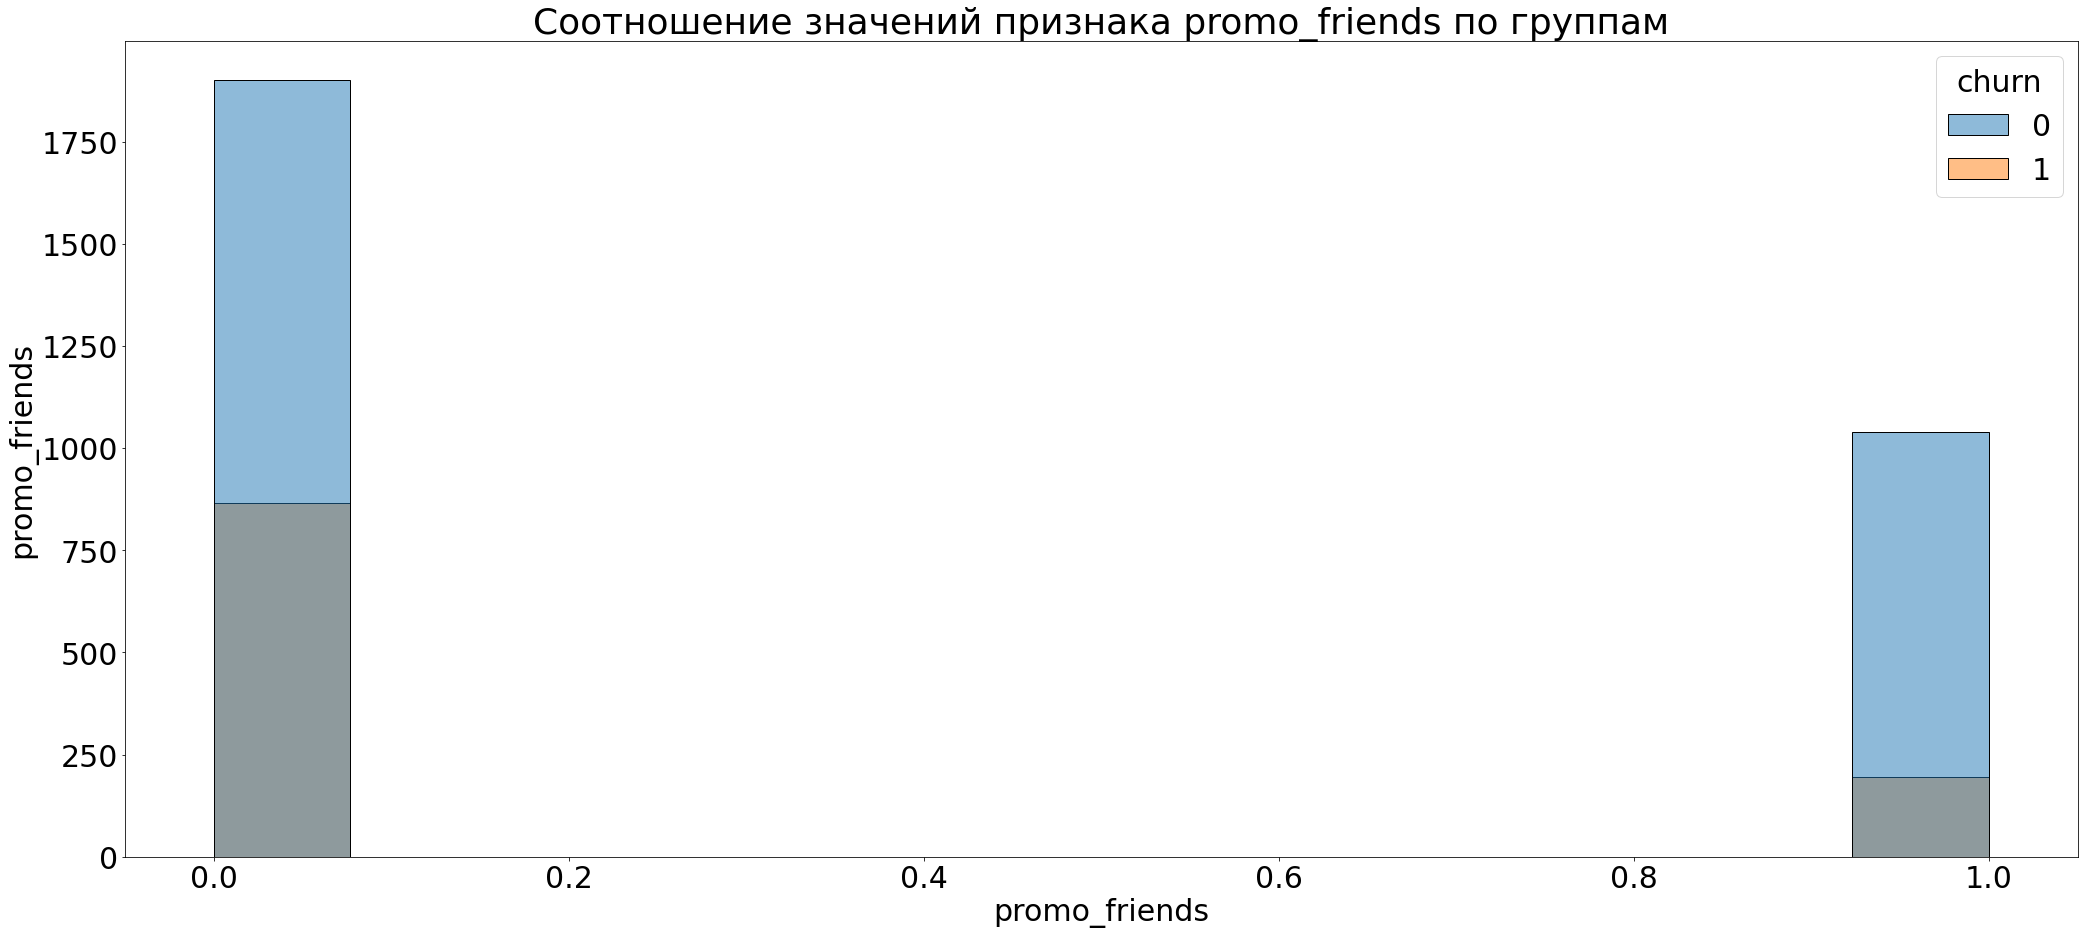

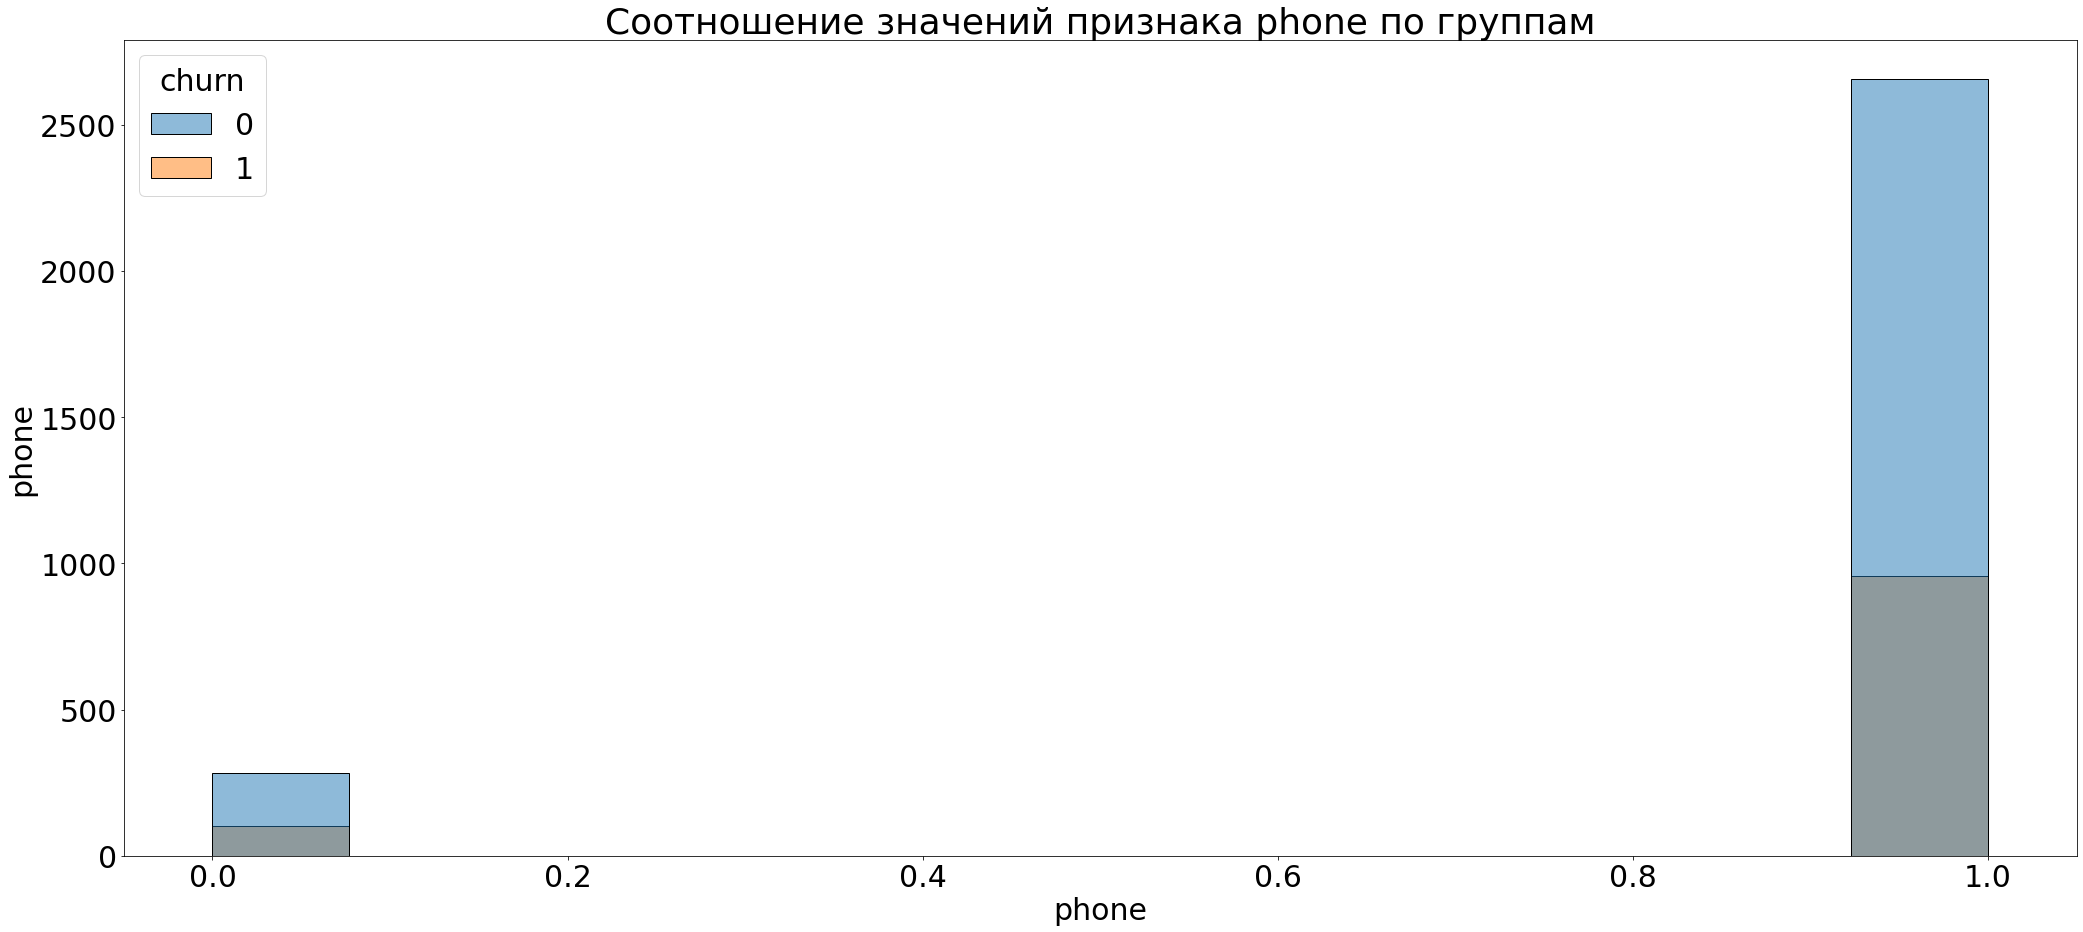

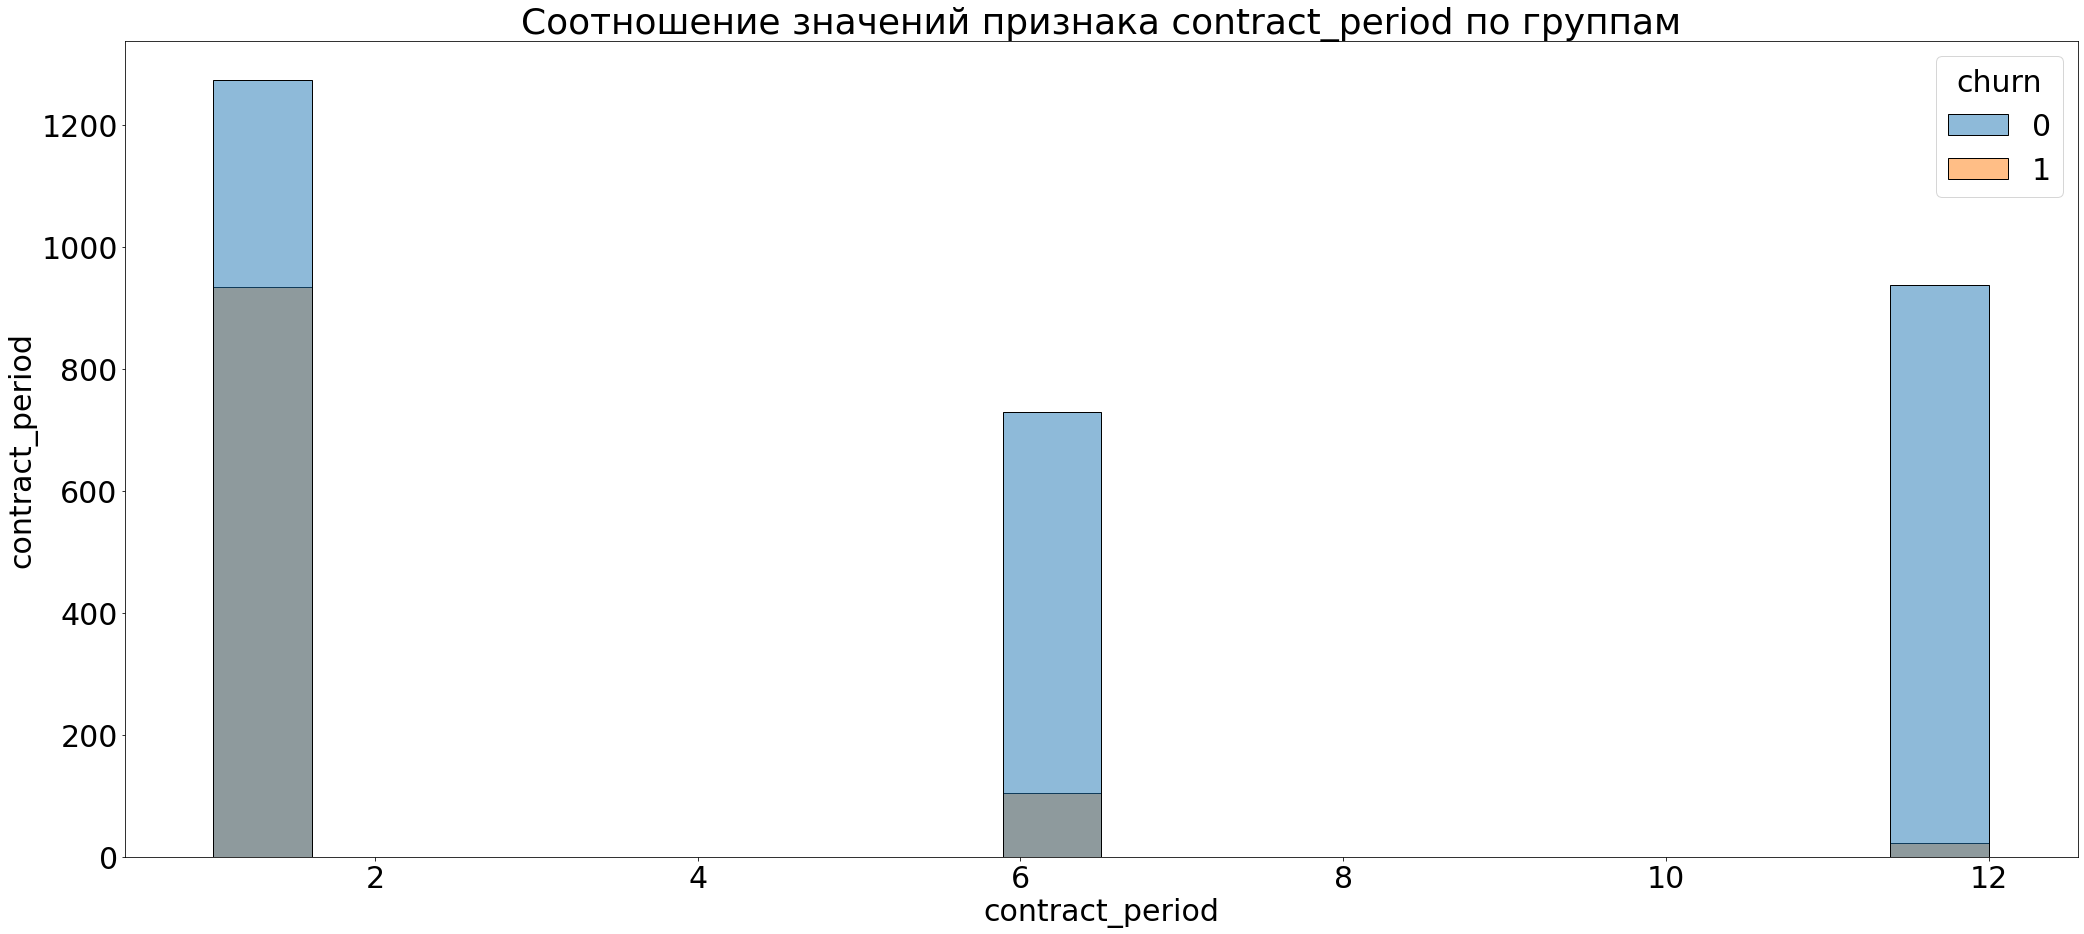

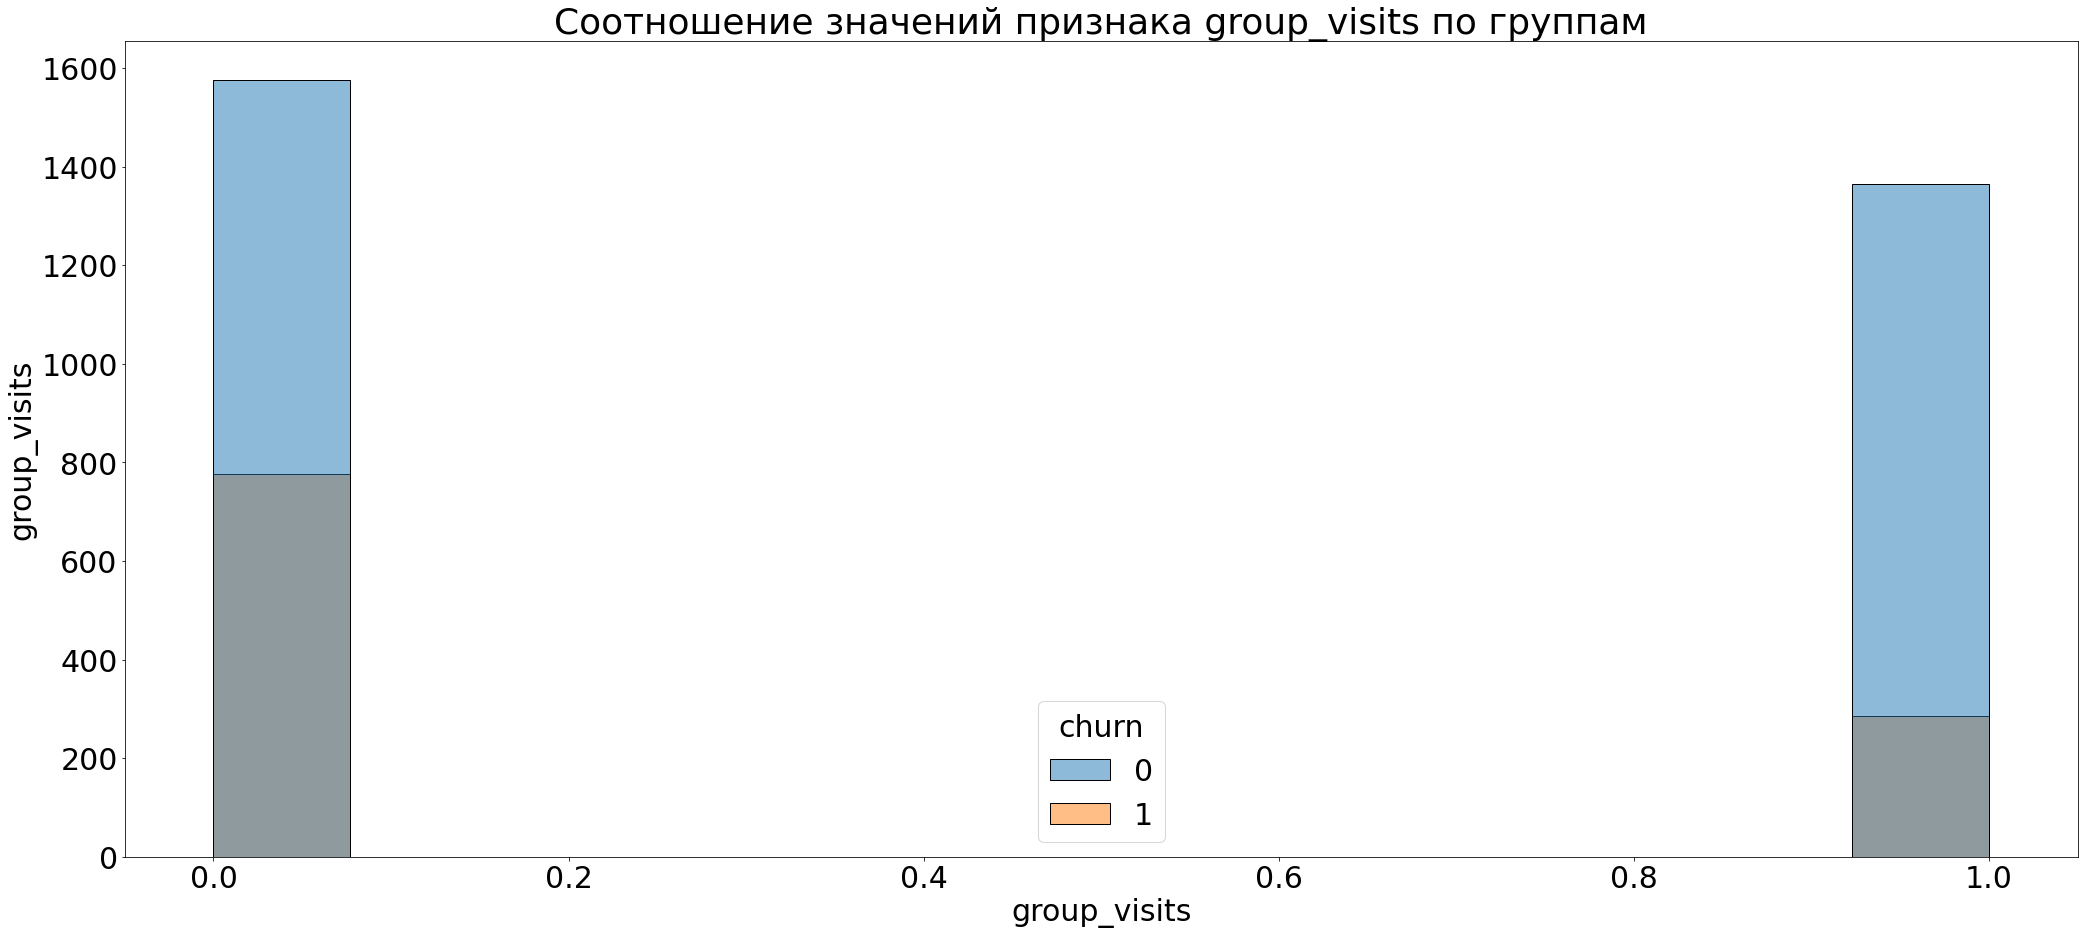

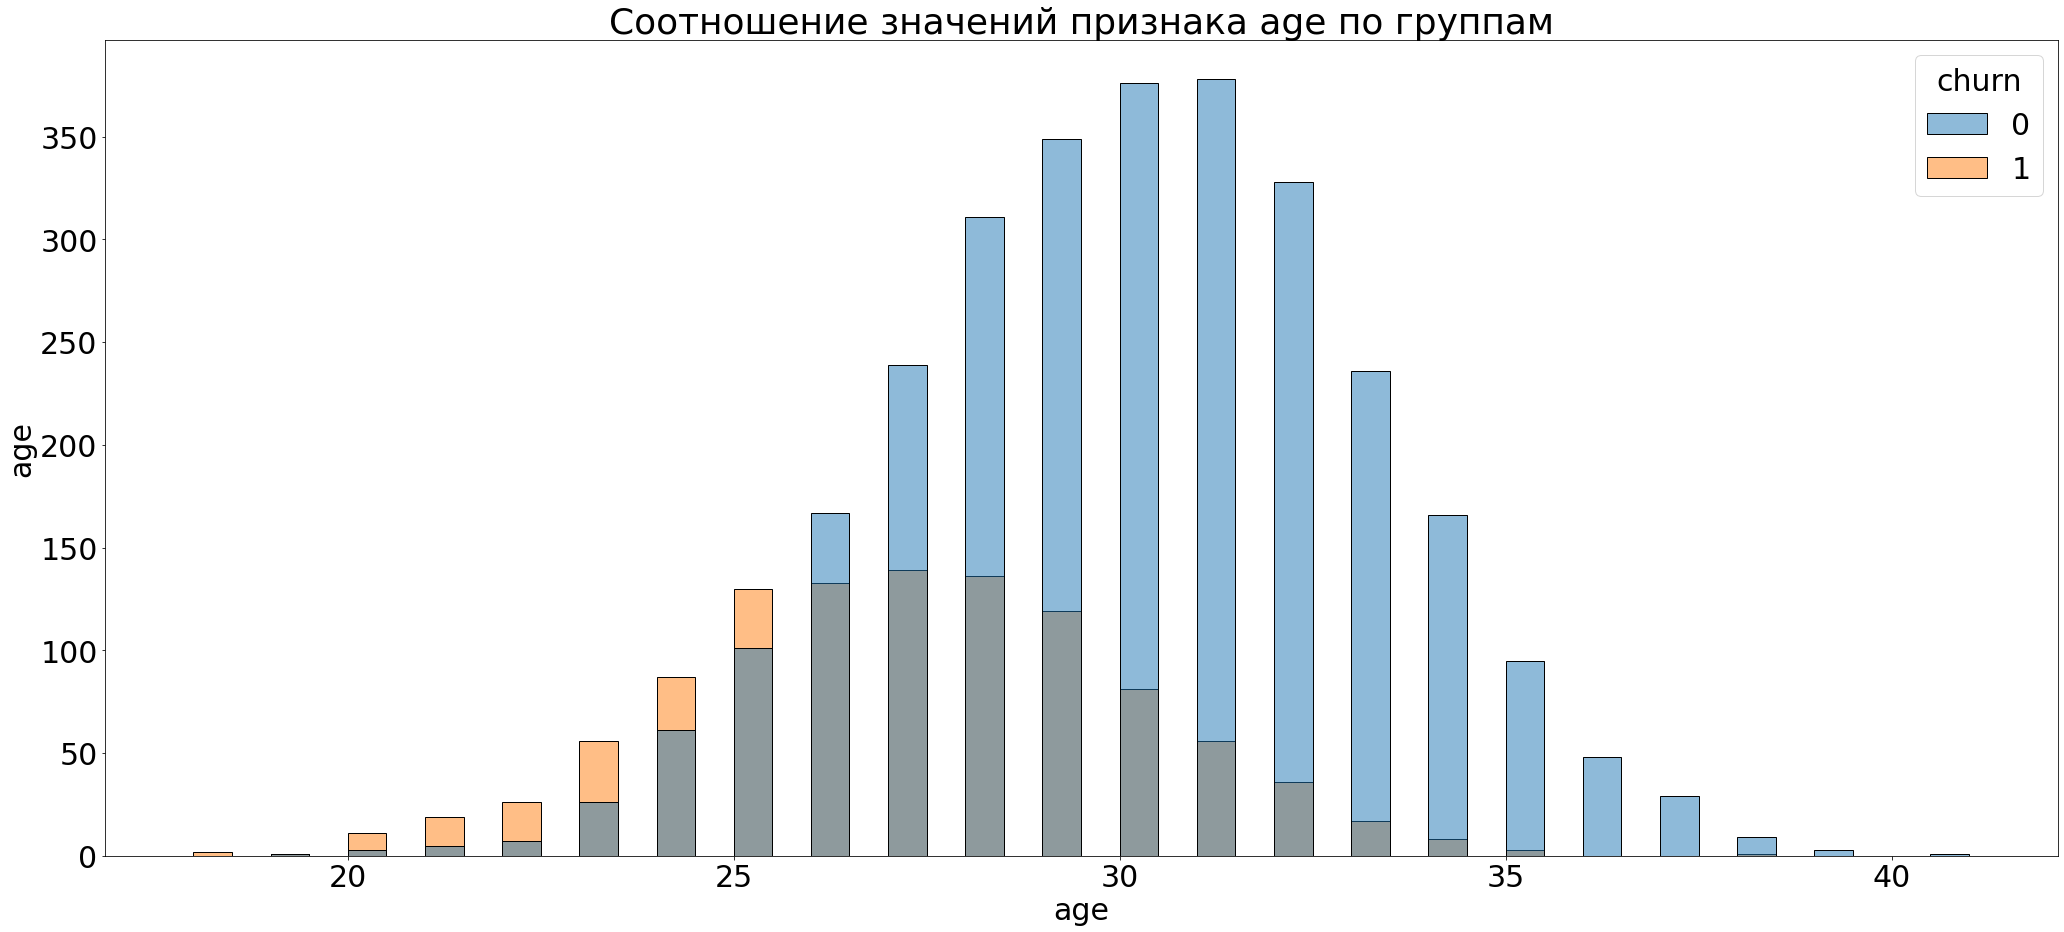

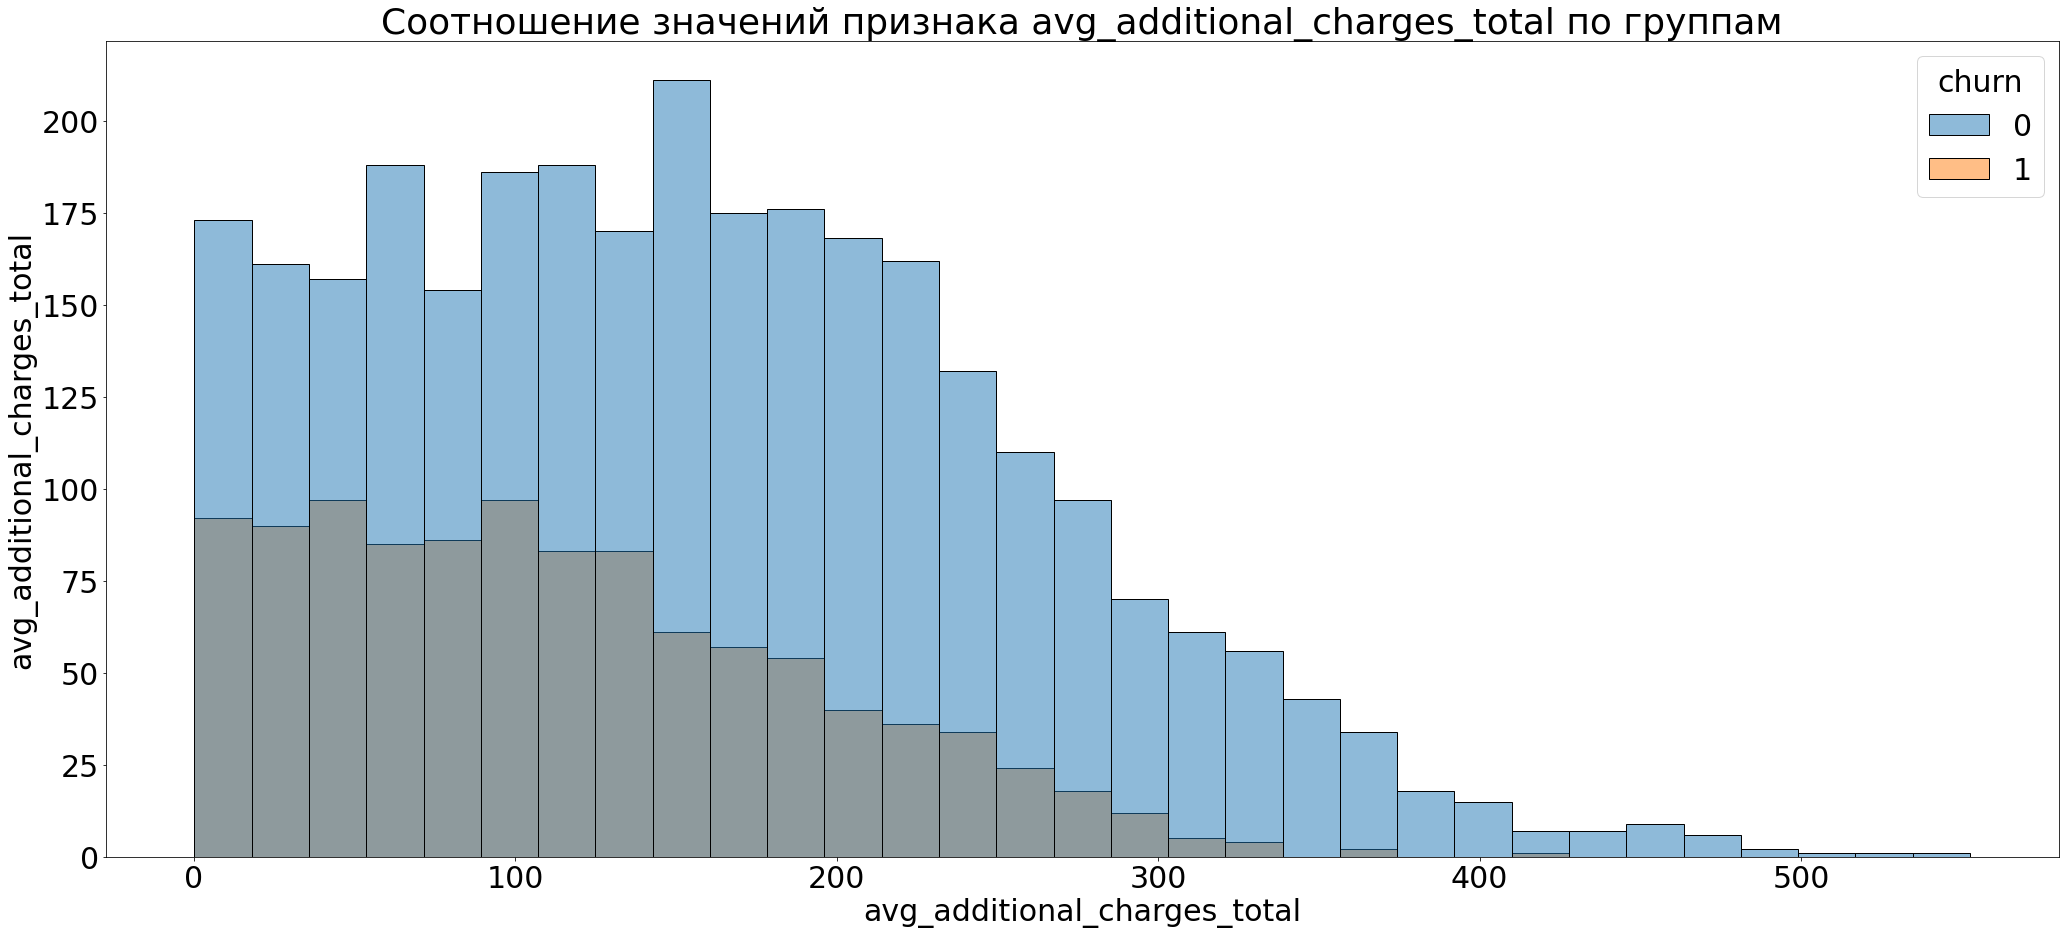

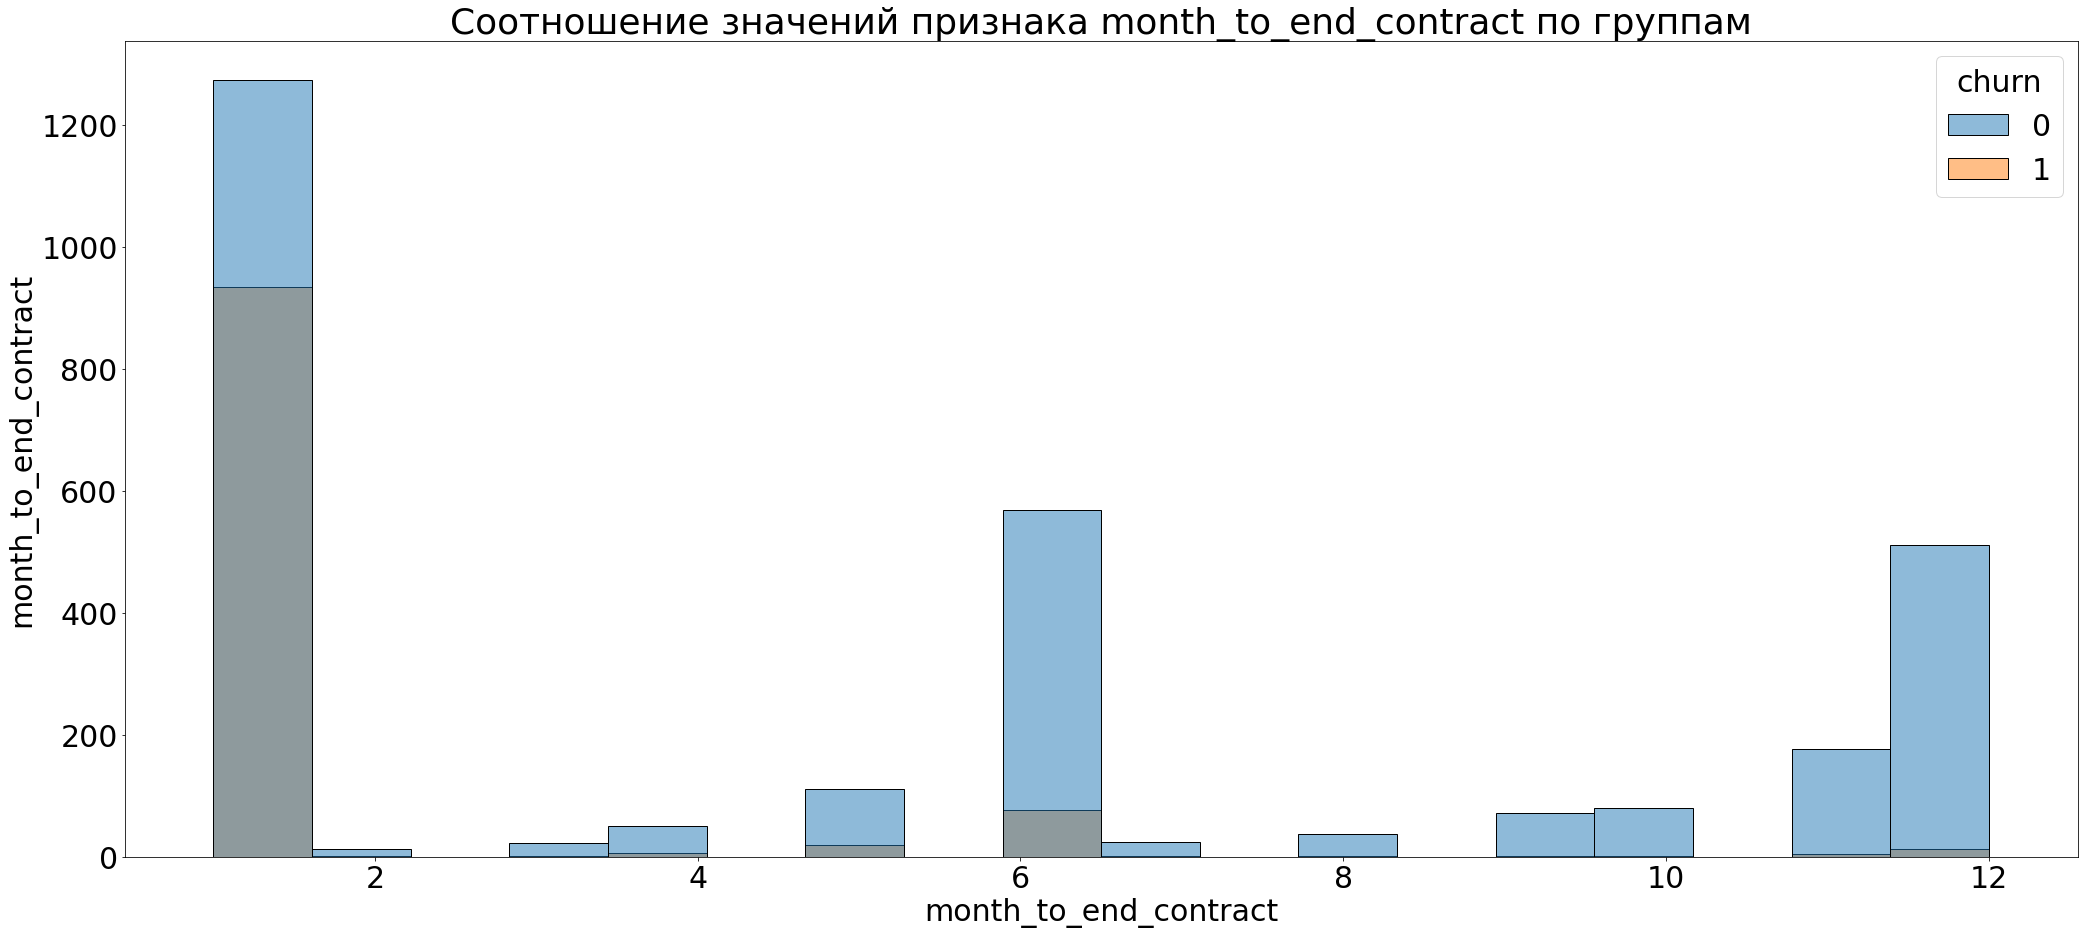

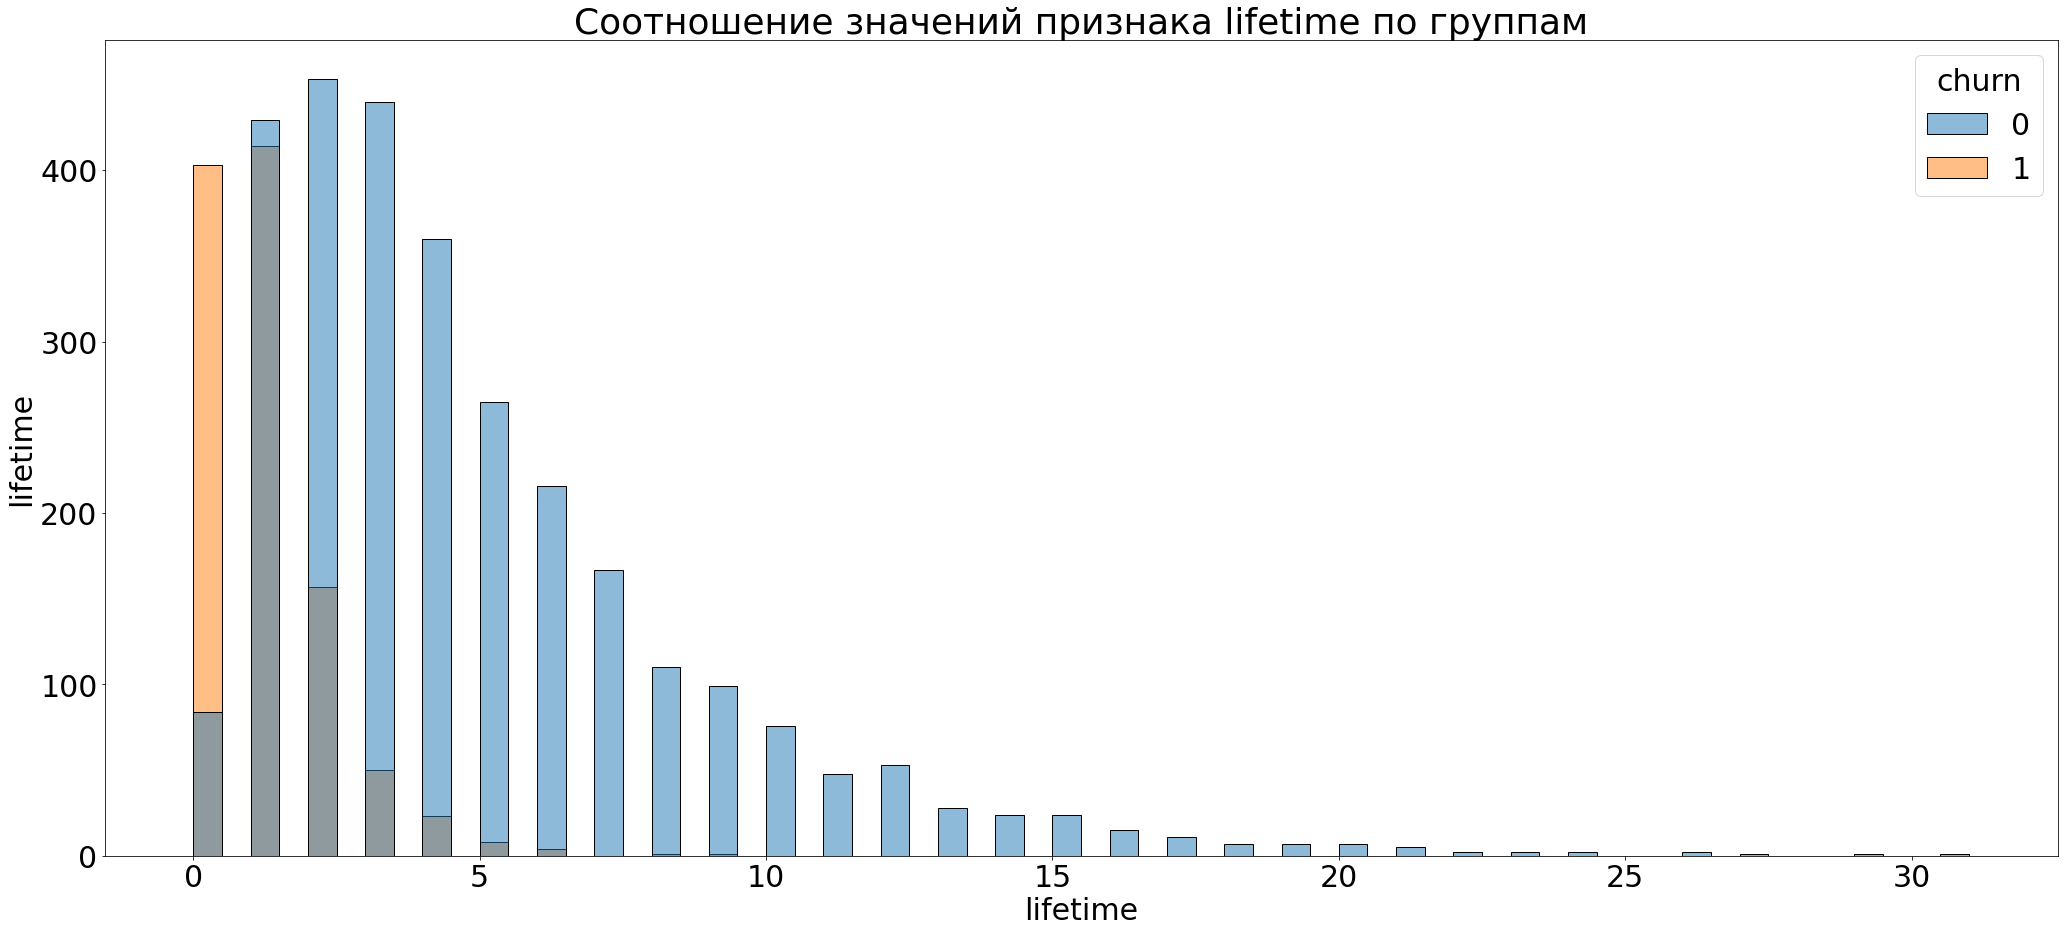

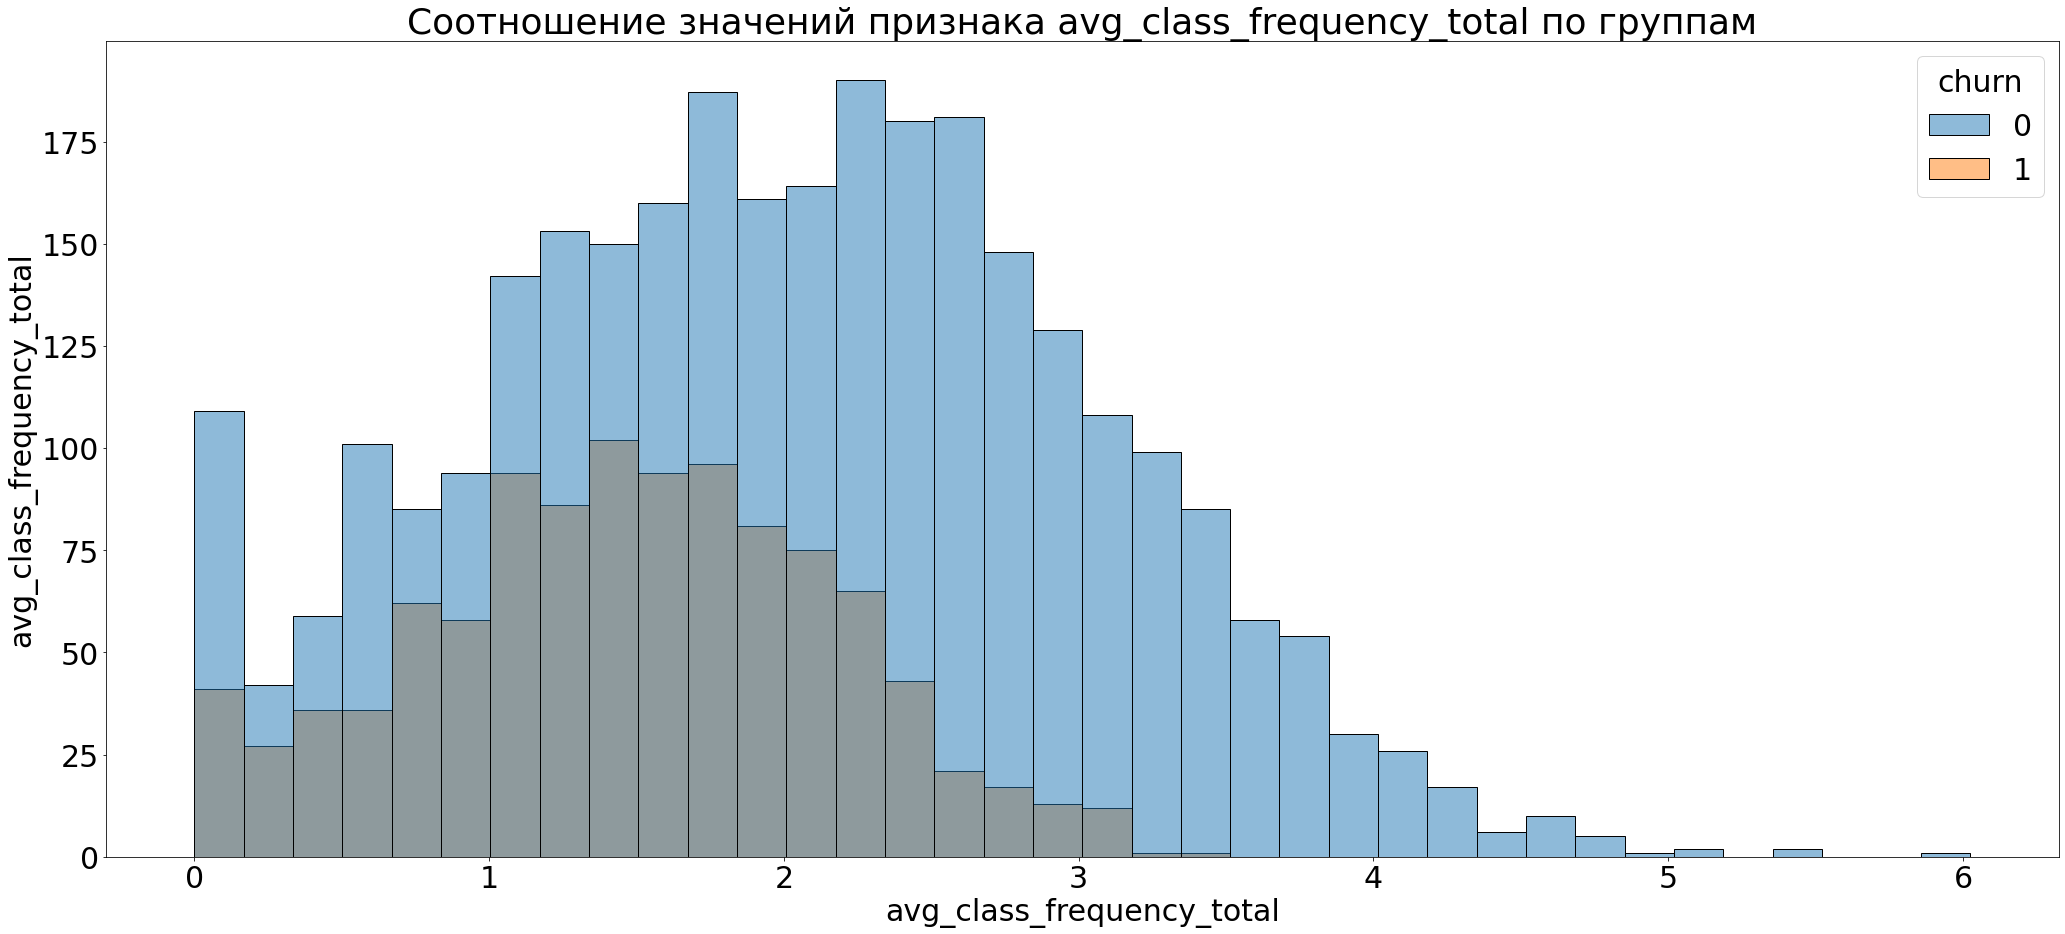

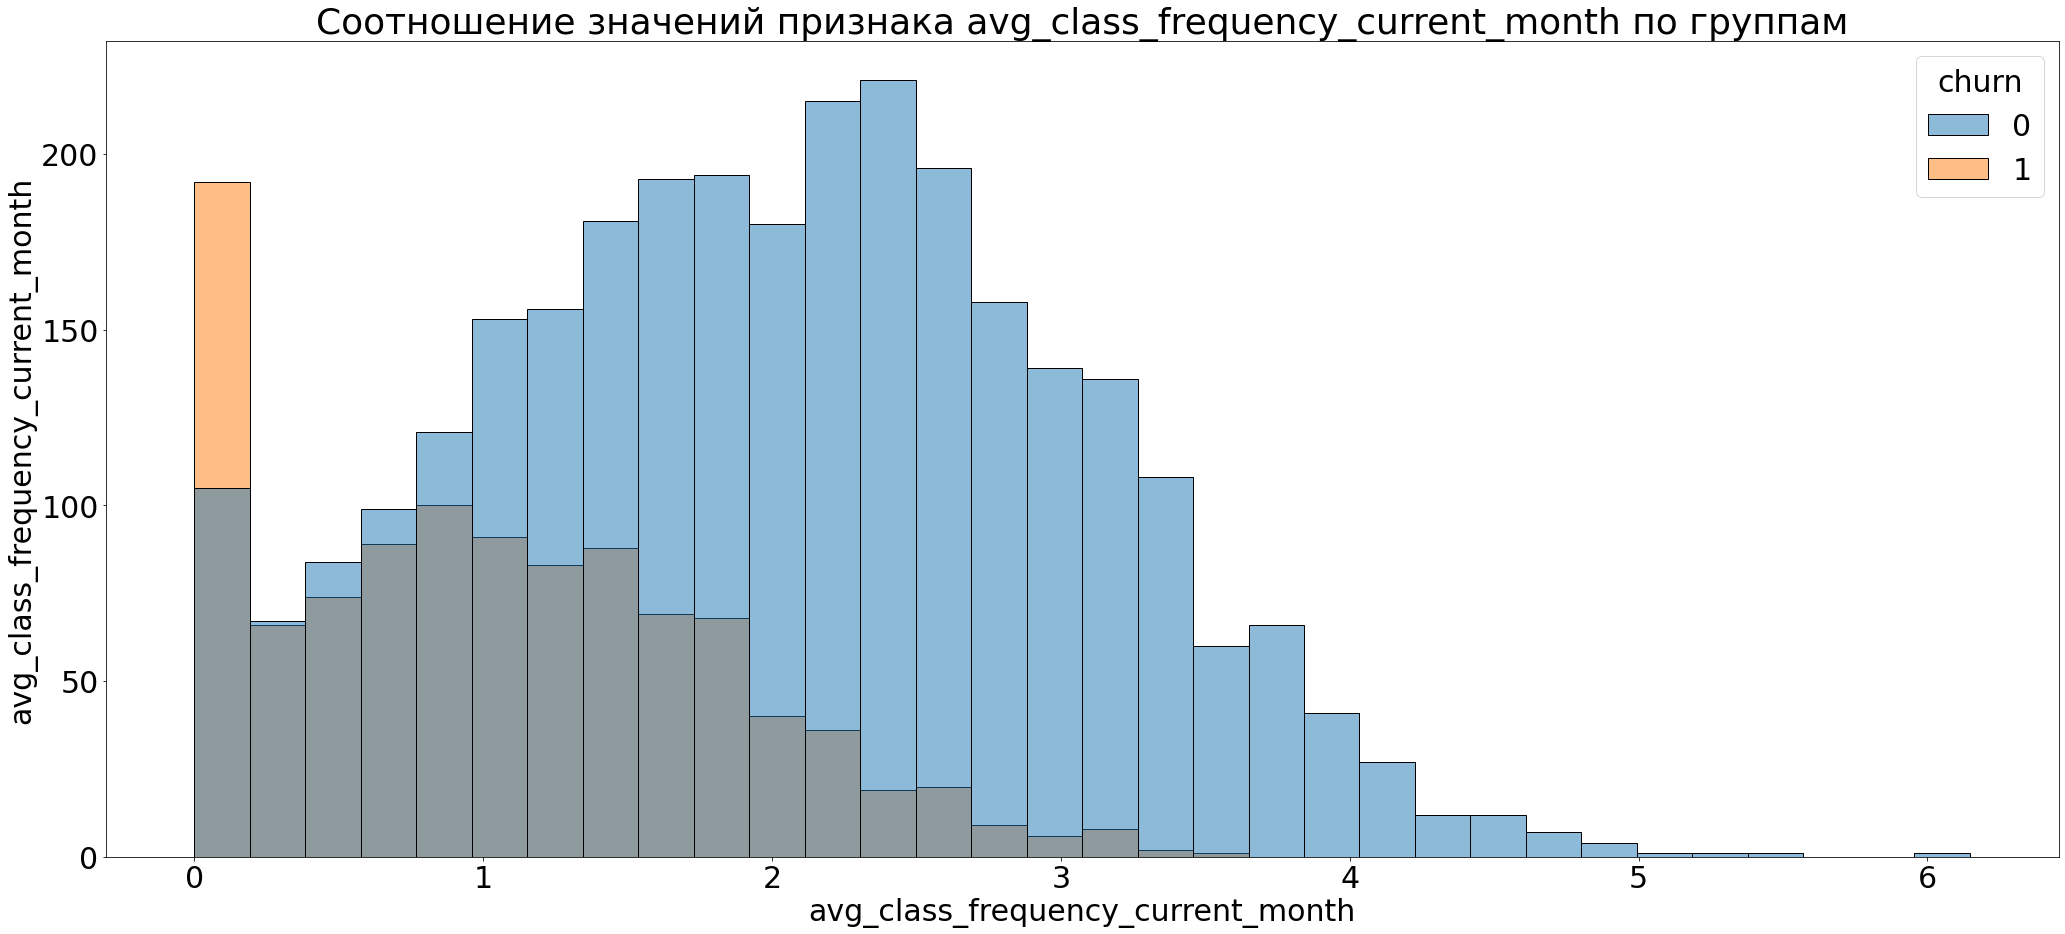

In [11]:
for index in fitness_data.columns[:-1]:
    plt.figure(figsize=(35, 15))
    plt.rcParams['font.size'] = '30'
    sbn.histplot(x=index, hue='churn', data=fitness_data)
    plt.title(f'Соотношение значений признака {index} по группам')
    plt.ylabel(f'{index}')
    plt.show()

In [12]:
fitness_data.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

Колонка gender - мужчин оставшихся больше в 2,5 раза чем женщин, в оттоке примерно такое же соотношение .

Колонка near_location - клиентов значительно больше, которые живут  или работают рядом с клубом. Постоянных клиентов в несколько раз больше, чем в оттоке.

Колонка partner - сотрудников компании-партнёра немного больше, чем простых клиентов. Оставшихся клиентов, работающих в компании-партнере в несколько раз больше других клиентов, а в оттоке больше клиентов без партнерства, чем клиентов с партнерством.

Колонка promo_friends - клиентов без промокода больше, чем с промокодом. Но в группе с промокодом отток в несколько раз меньше, чем в группе без промокода.

Колонка phone - количество клиентов, оставивших свой телефон в записи, значительно больше, чем тех кто не оставил. Отток в несколько раз меньше у оставивших свой телефон в записи, чем в другой группе.

Колонка contract_period - больше клиентов, но не намного, заплативших за период 1 месяц, но отток в этой группе в несколько раз больше. В группе, заплативших за полгода, оставшихся клиентов в несколько раз больше оттока. И в группе, заплативших за 1 год почти все клиенты в числе оставшихся. 

Колонка group_visits - не любителей групповых занятий немного больше. В этой группе оттоке и оставшихся клиентов одинаковое количество. В группе любителей групповых занятий отток клиентов в несколько раз меньше остальных клиентов.

Колонка age - большая часть оставшихся клиентов, люди в возрасте в возрасте от 28 до 40 лет, здесь отток меньше всего. Отток клиентов больше всего у людей в возрасте до 28 лет.

Колонка avg_additional_charges_total - суммарная выручка от других услуг примерно в 2 раза больше у оставшися клиентов

Колонка month_to_end_contract - отток больше всего у клиентов, оформивших подписку на 1 месяц. Почти нет оттока у тех, кто купил подписку на 5, 6 и 12 месяцев.

Колонка lifetime - Отток больше всего у клиентов, посещавших клуб до 2 месяцев. А от 2 месяцев до 20 месяцев оттток значительно меньше.

Колонка Avg_class_frequency_total - средняя частота посещений в неделю за все время с начала действия абонемента примерно в 2 раза больше у оставшися клиентов.

Колонка Avg_class_frequency_current_month -  средняя частота посещений в неделю за предыдущий месяц примерно в 2 раза меньше в оттоке. 


### Матрица корреляций

In [13]:
cm=fitness_data.corr()
cm

gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.045561   
churn                              0.000708      -0.128098 -0.157986   

                                   promo_friends     phone  contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
near_location                           0.210964 -0.015763         0.150233   
partner                                 0.451960  0.009970         0.306166   
promo_friends                           1.000000  0.001982         0.244552   
phone                                   0.001982  1.000000        -0.006893   
contract_period                         0.244552 -0.006893         1.000000   
group_visits                            0.120170 -0.010099         0.169991   
age                                     0.050113 -0.011403         0.138249   
avg_additional_charges_total            0.036898  0.009279         0.111445   
month_to_end_contract                   0.239553 -0.011196         0.973064   
lifetime                                0.072721 -0.018801         0.170725   
avg_class_frequency_total               0.028063  0.008340         0.096211   
avg_class_frequency_current_month       0.053768  0.013375         0.159407   
churn                                  -0.162233 -0.001177        -0.389984   

                                   group_visits       age  \
gender                                 0.017879  0.013807   
near_location                          0.154728  0.058358   
partner                                0.022710  0.047480   
promo_friends                          0.120170  0.050113   
phone                                 -0.010099 -0.011403   
contract_period                        0.169991  0.138249   
group_visits                           1.000000  0.080934   
age                                    0.080934  1.000000   
avg_additional_charges_total           0.032079  0.080240   
month_to_end_contract                  0.163703  0.134511   
lifetime                               0.075853  0.164693   
avg_class_frequency_total              0.056695  0.119953   
avg_class_frequency_current_month      0.075923  0.183095   
churn                                 -0.175325 -0.404735   

                                   avg_additional_charges_total  \
gender                                                -0.009334   
near_location                                          0.040761   
partner                                                0.022941   
promo_friends                                          0.036898   
phone                                                  0.009279   
contract_period                                        0.111445   
group_visits                                           0.032079   
age                                                    0.080240   
avg_additional_charges_total                           1.000000   
month_to_end_contract                                  0.113958   
lifetime                                               0.079028   
avg_class_frequency_total                         

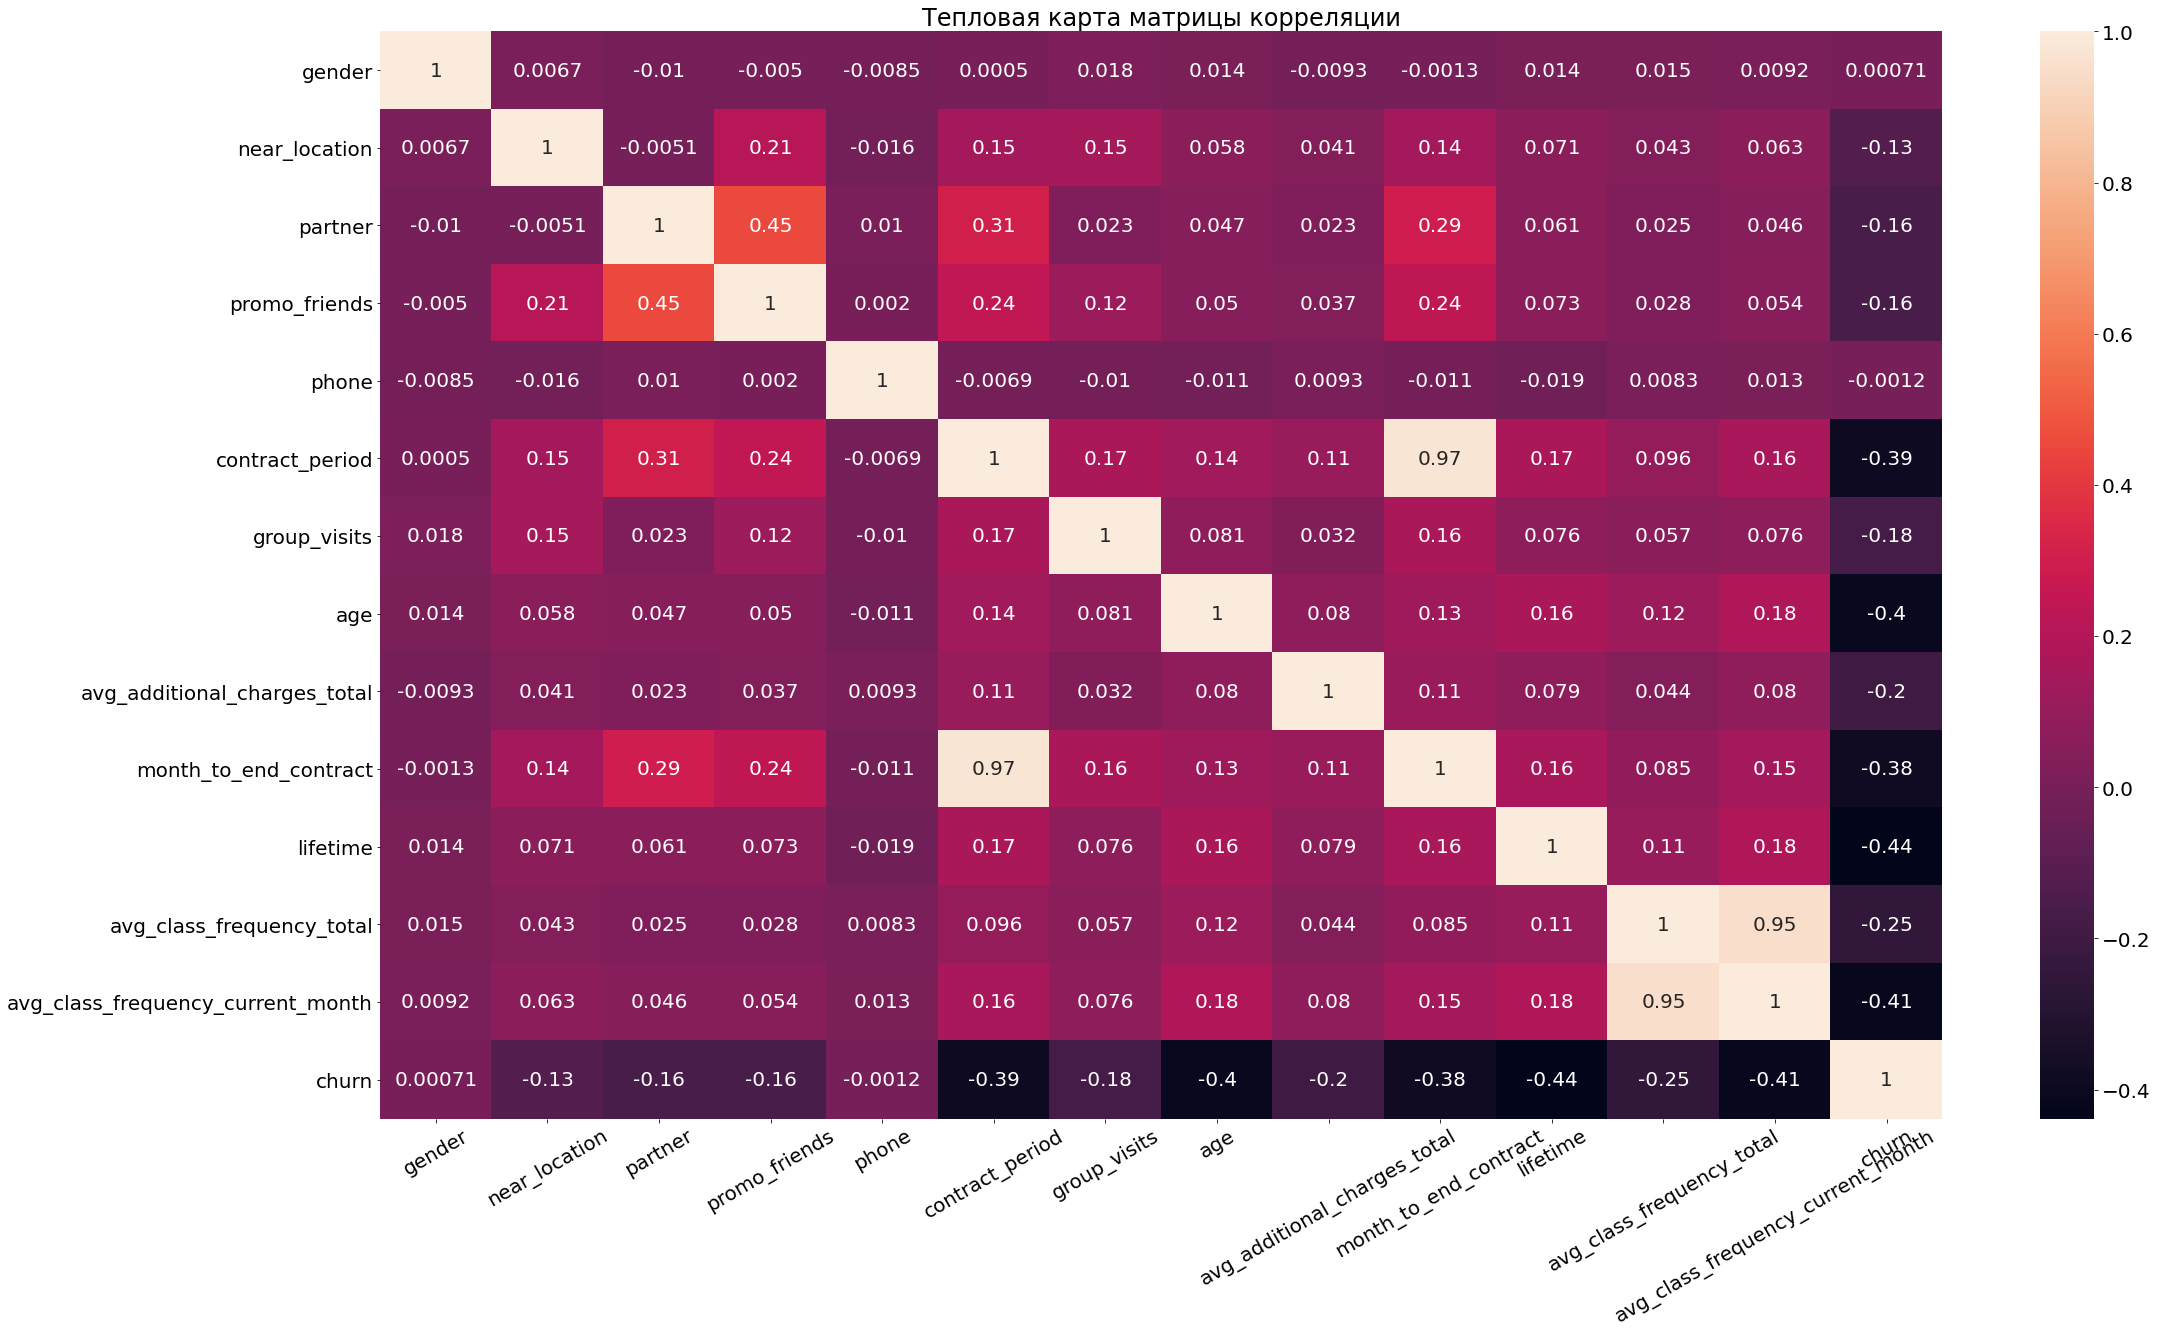

In [14]:
#Построим тепловую карту по матрице корреляций
plt.figure(figsize=(35, 20))
plt.rcParams['font.size'] = '20'
sbn.heatmap(cm, annot = True, square=False)
plt.title('Тепловая карта матрицы корреляции')
plt.xticks(rotation=30)
plt.show()

Есть небольшие зависимости, меньше 0.8 между колонками partner и promo_friends, и высокая зависимость между avg_class_frequency_total и аvg_class_frequency_current_month, contract_period и month_to_end_contract, эти данные дополняют друга друга.

## Модель прогнозирования оттока клиентов

### Разбивка данных на обучающую и валидационную выборку функцией train_test_split()

In [15]:
#Сделаем целевую переменную и матрицу признаков
X=fitness_data.drop('churn', axis=1)
y=fitness_data['churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Создание моделей логистическая регрессия и случайный лес

In [17]:
#Логистическая регрессия
model_lr = LogisticRegression(random_state=0, solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [18]:
#Случайный лес
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

### Оценка метрик accuracy, precision и recall для обеих моделей на валидационной выборке

In [19]:
#Создадим функцию для расчета метрик
def print_metrics(y_test, y_pred):
    print('Метрики классификации')
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    

In [20]:
#Посчитаем метрики в модели логитическая регрессия
print_metrics(y_test, y_pred_lr)

Метрики классификации
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [21]:
#Посчитаем метрики в модели случайный лес
print_metrics(y_test, y_pred_rf)

Метрики классификации
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


Метрики показали почти одинаковые результаты, обе модели одинаково выполняют поставленную им задачу.

## Модель прогнозирования оттока клиентов

### Стандартизация данных

In [22]:
#Посчитаем метрики в модели логитическая регрессия
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)


### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

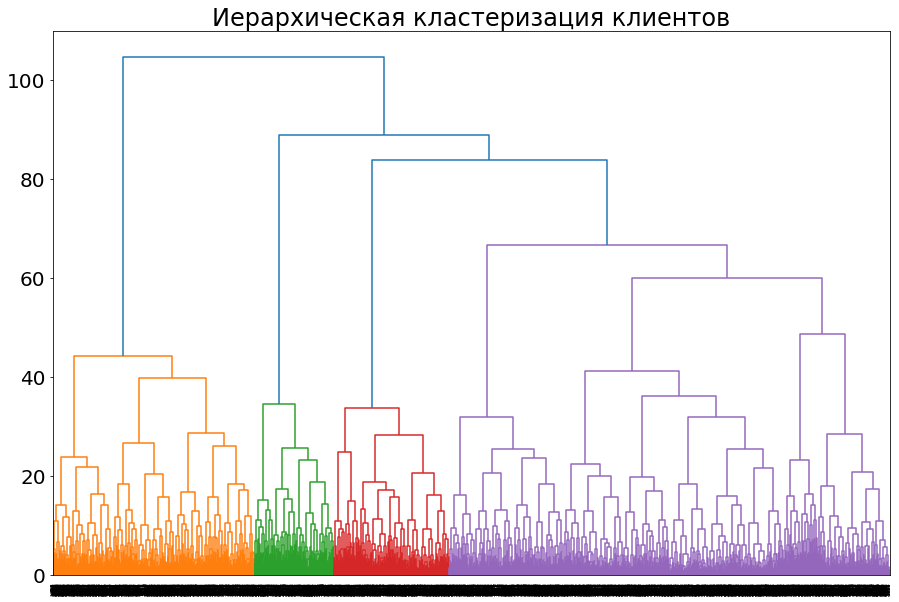

In [31]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show()

На основании дендрограммы выберим 5 кластеров иерархической кластеризации

### Обучение модели кластеризации на основании алгоритма K-Means 

In [24]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

In [25]:
#Сделаем оценку качества модели
silhouette_score(X_sc, labels) 

0.14140953623023353

Качество модели не очень хорошее.

### Средние значения признаков по кластерам

In [26]:
#Добавим колонку clusters в исходную таблицу
fitness_data['clusters']=labels

In [27]:
#Посчитаем средние значения призанков по кластерам
data_clusters=fitness_data.groupby('clusters').mean()
data_clusters

gender  near_location   partner  promo_friends     phone  \
clusters                                                               
0         0.502970       0.959406  0.783168       0.574257  1.000000   
1         0.522078       0.862338  0.470130       0.306494  0.000000   
2         0.495050       0.000000  0.463366       0.079208  1.000000   
3         0.485737       1.000000  0.350238       0.240095  1.000000   
4         0.559666       0.976134  0.356802       0.230310  0.998807   

          contract_period  group_visits        age  \
clusters                                             
0               10.889109      0.542574  29.982178   
1                4.787013      0.425974  29.301299   
2                2.352475      0.215842  28.477228   
3                1.948494      0.341521  28.167987   
4                2.669451      0.473747  30.125298   

          avg_additional_charges_total  month_to_end_contract  lifetime  \
clusters                                                                  
0                           160.761016               9.954455  4.736634   
1                           143.957664               4.475325  3.924675   
2                           135.457501               2.198020  2.809901   
3                           131.622204               1.856577  2.440571   
4                           161.657905               2.459427  4.898568   

          avg_class_frequency_total  avg_class_frequency_current_month  \
clusters                                                                 
0                          1.982055                           1.974789   
1                          1.847220                           1.716369   
2                          1.660461                           1.477324   
3                          1.247634                           1.012983   
4                          2.852002                           2.850161   

             churn  
clusters            
0         0.027723  
1         0.267532  
2         0.443564  
3         0.514263  
4         0.068019

Там где средние значения примерно одинаковые, признак не влияет на отток, где средние значения отличаются, признак влияет. 

### Распределение признаков по кластерам

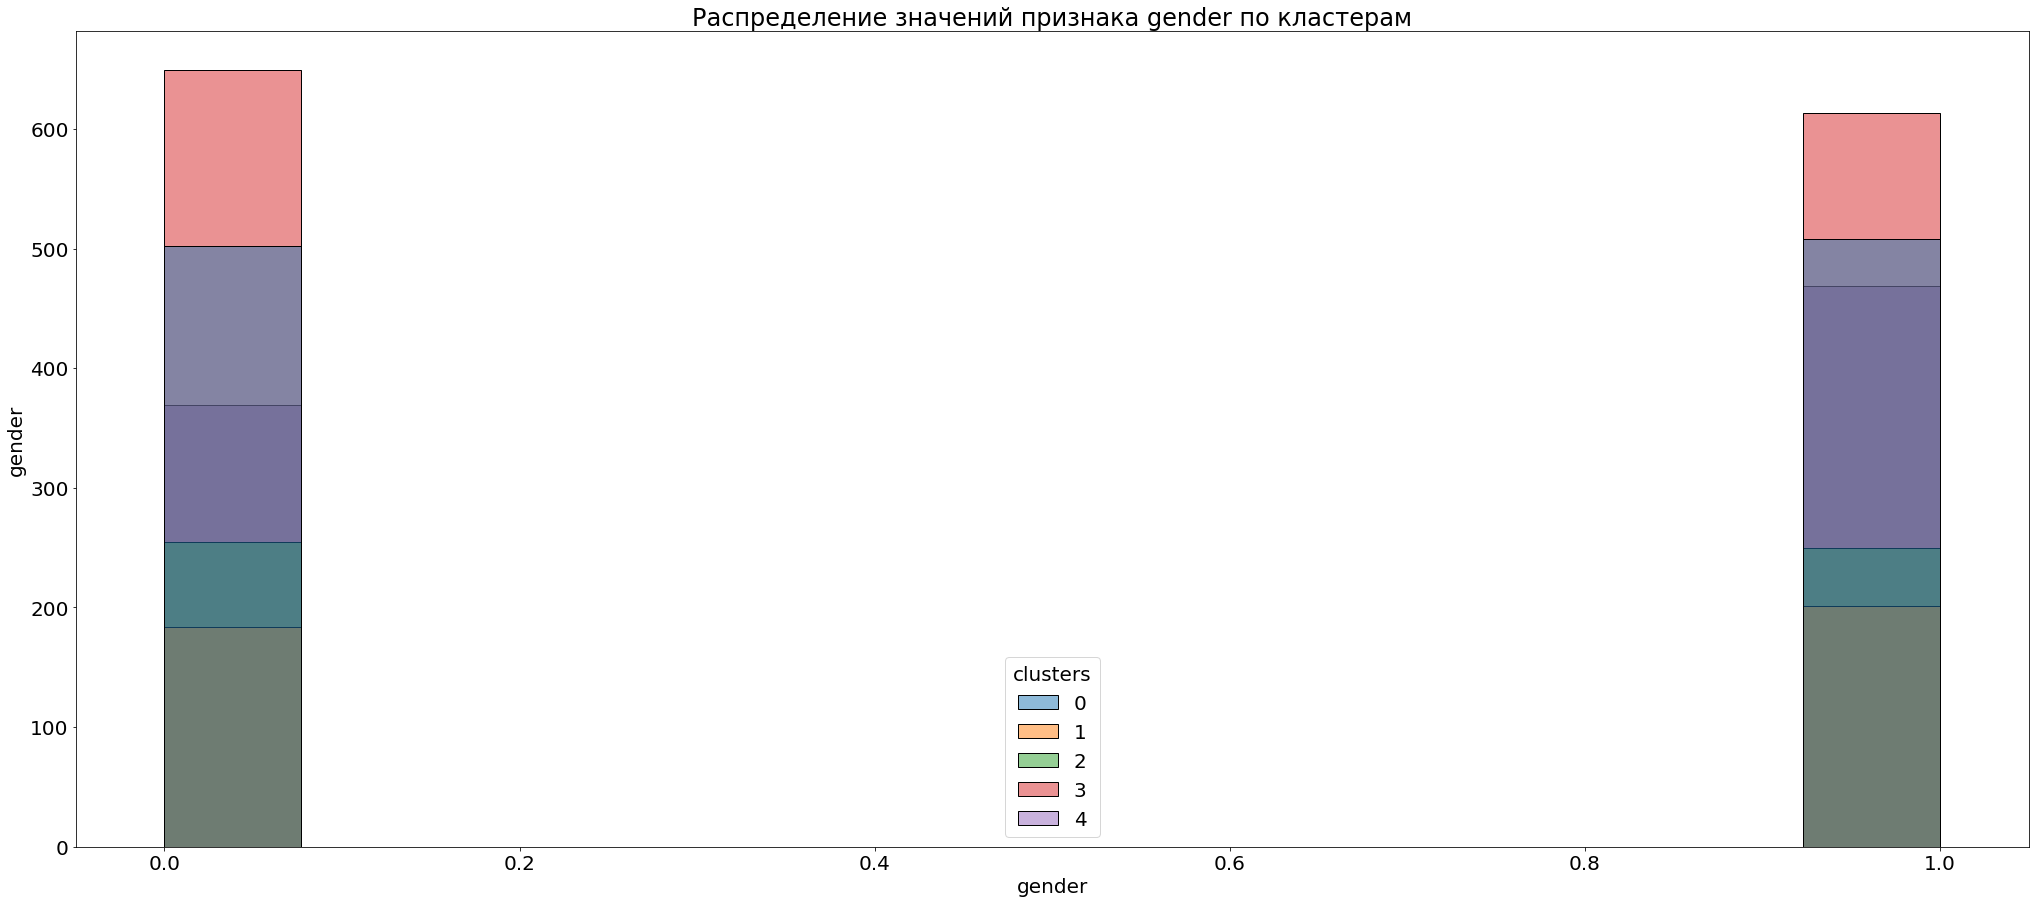

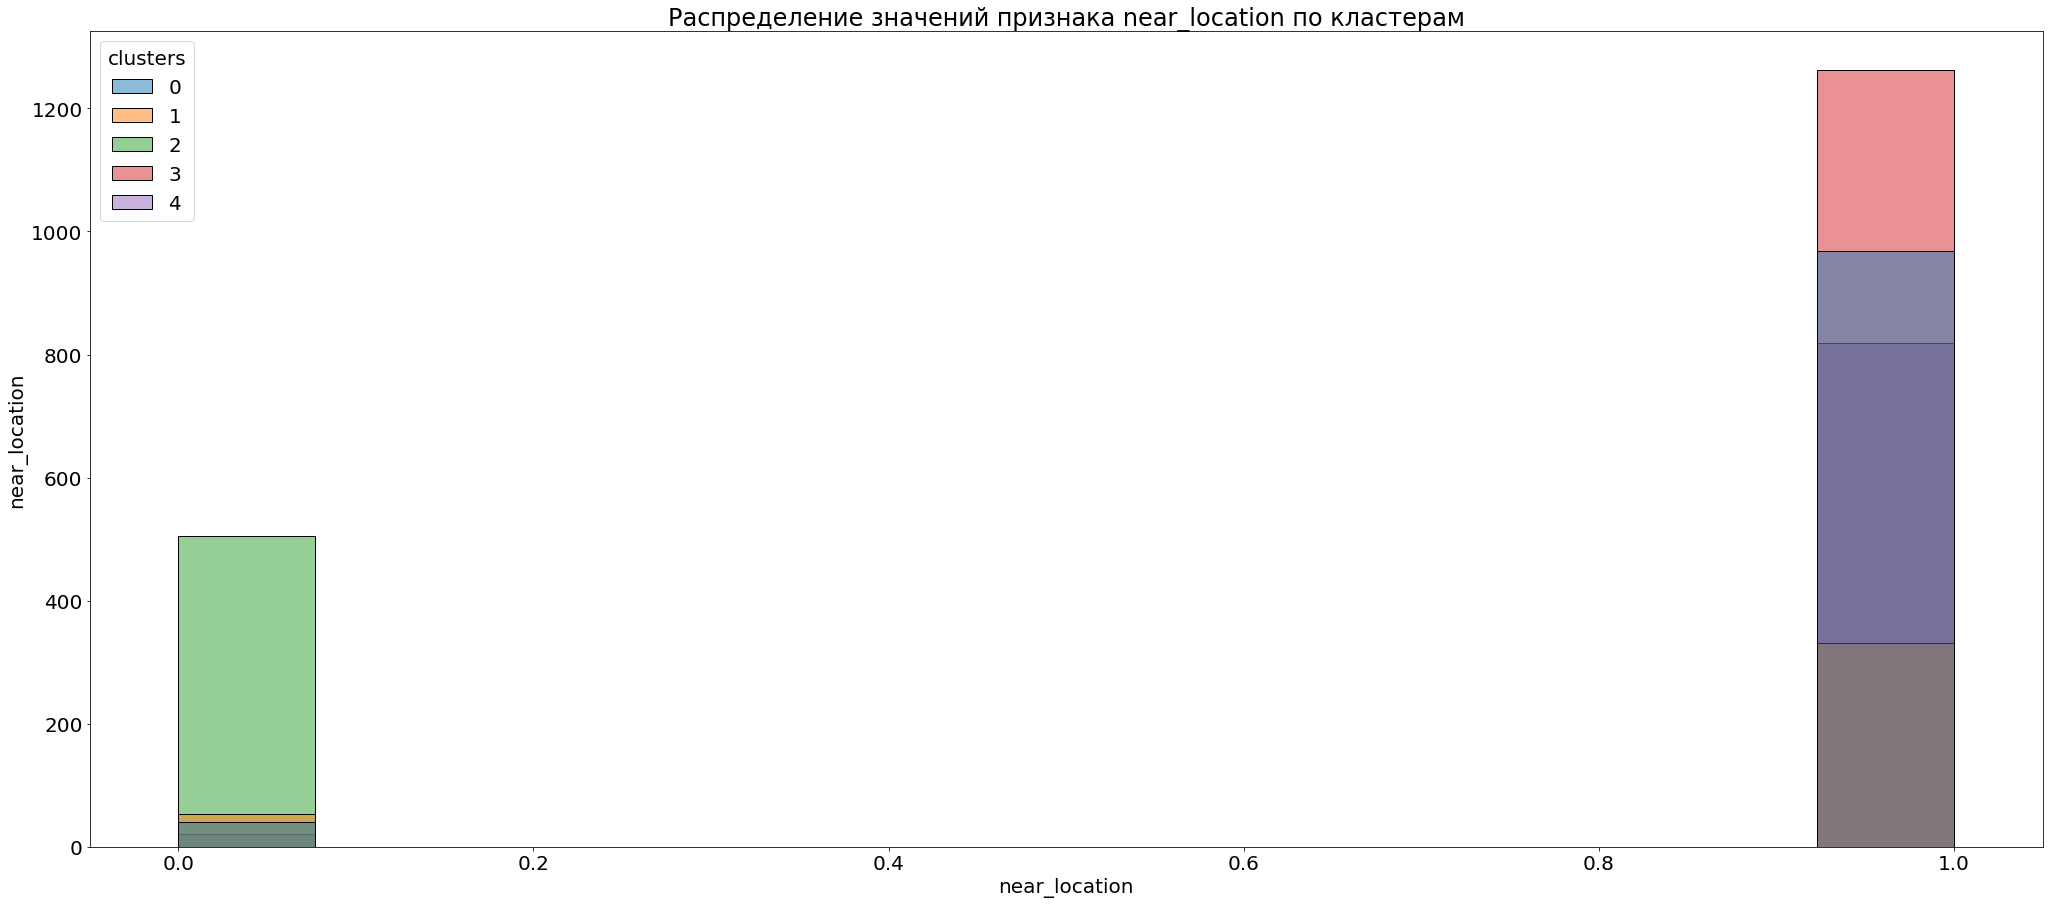

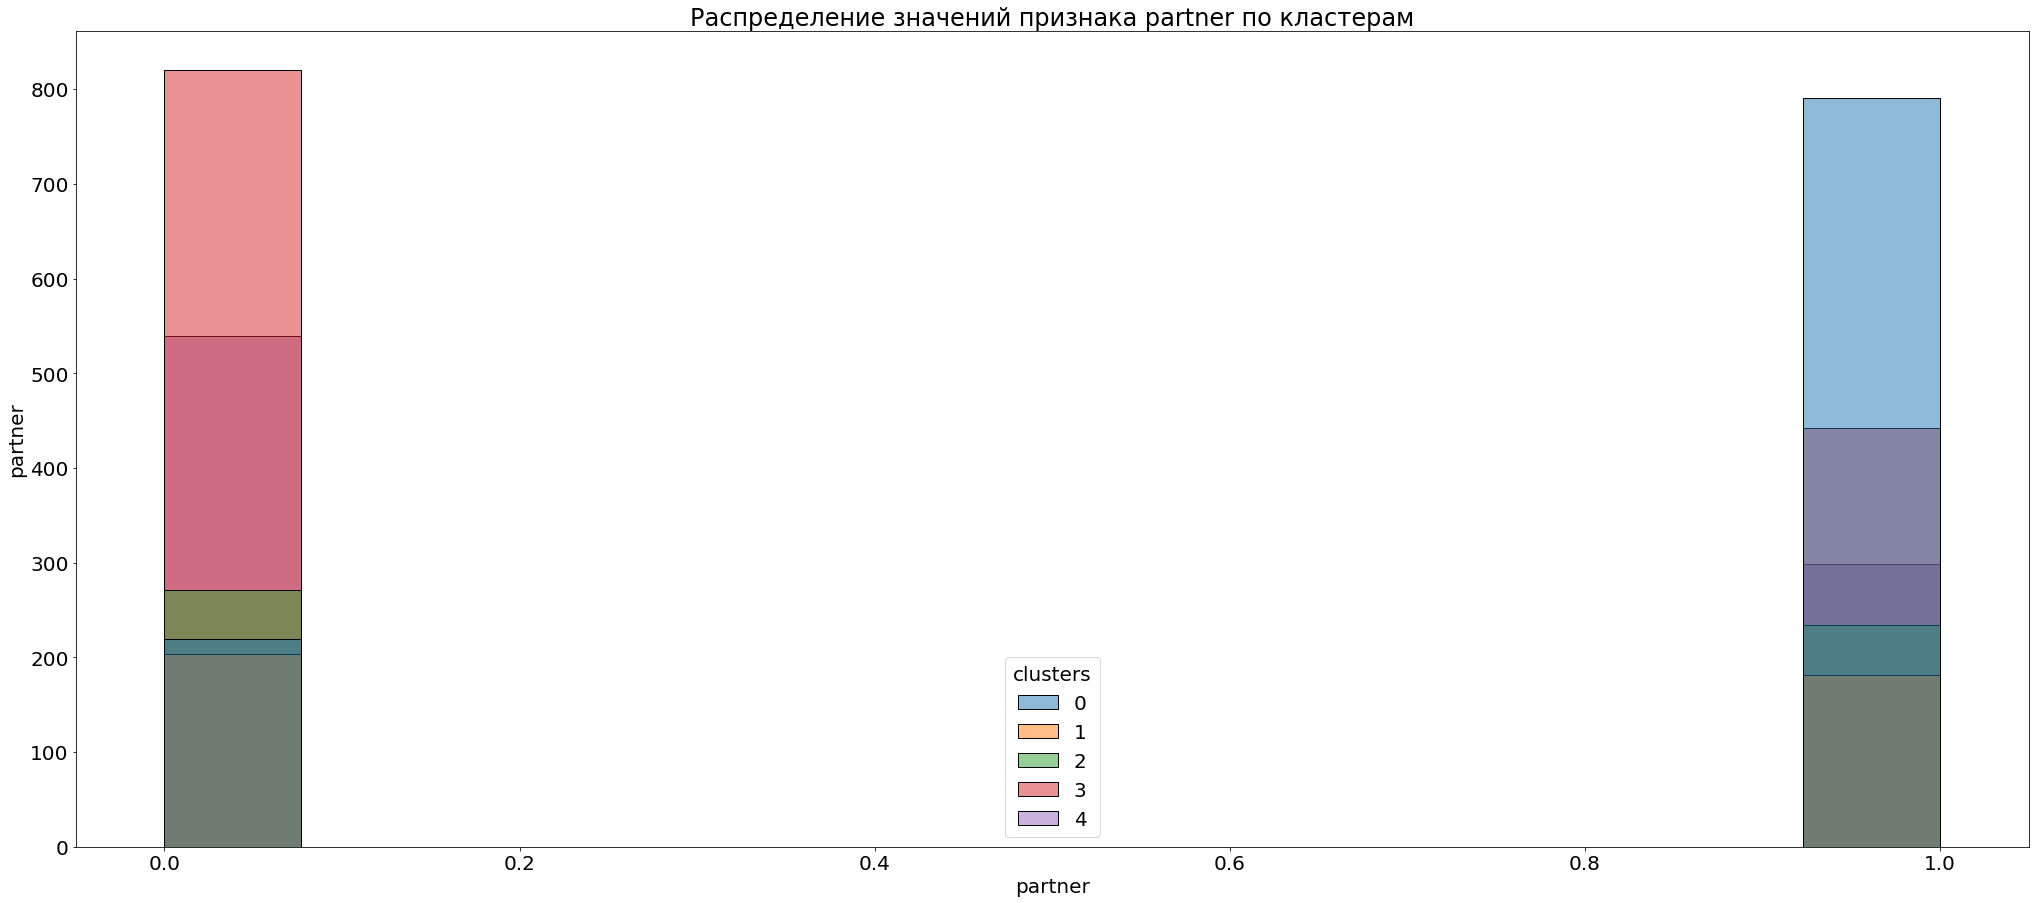

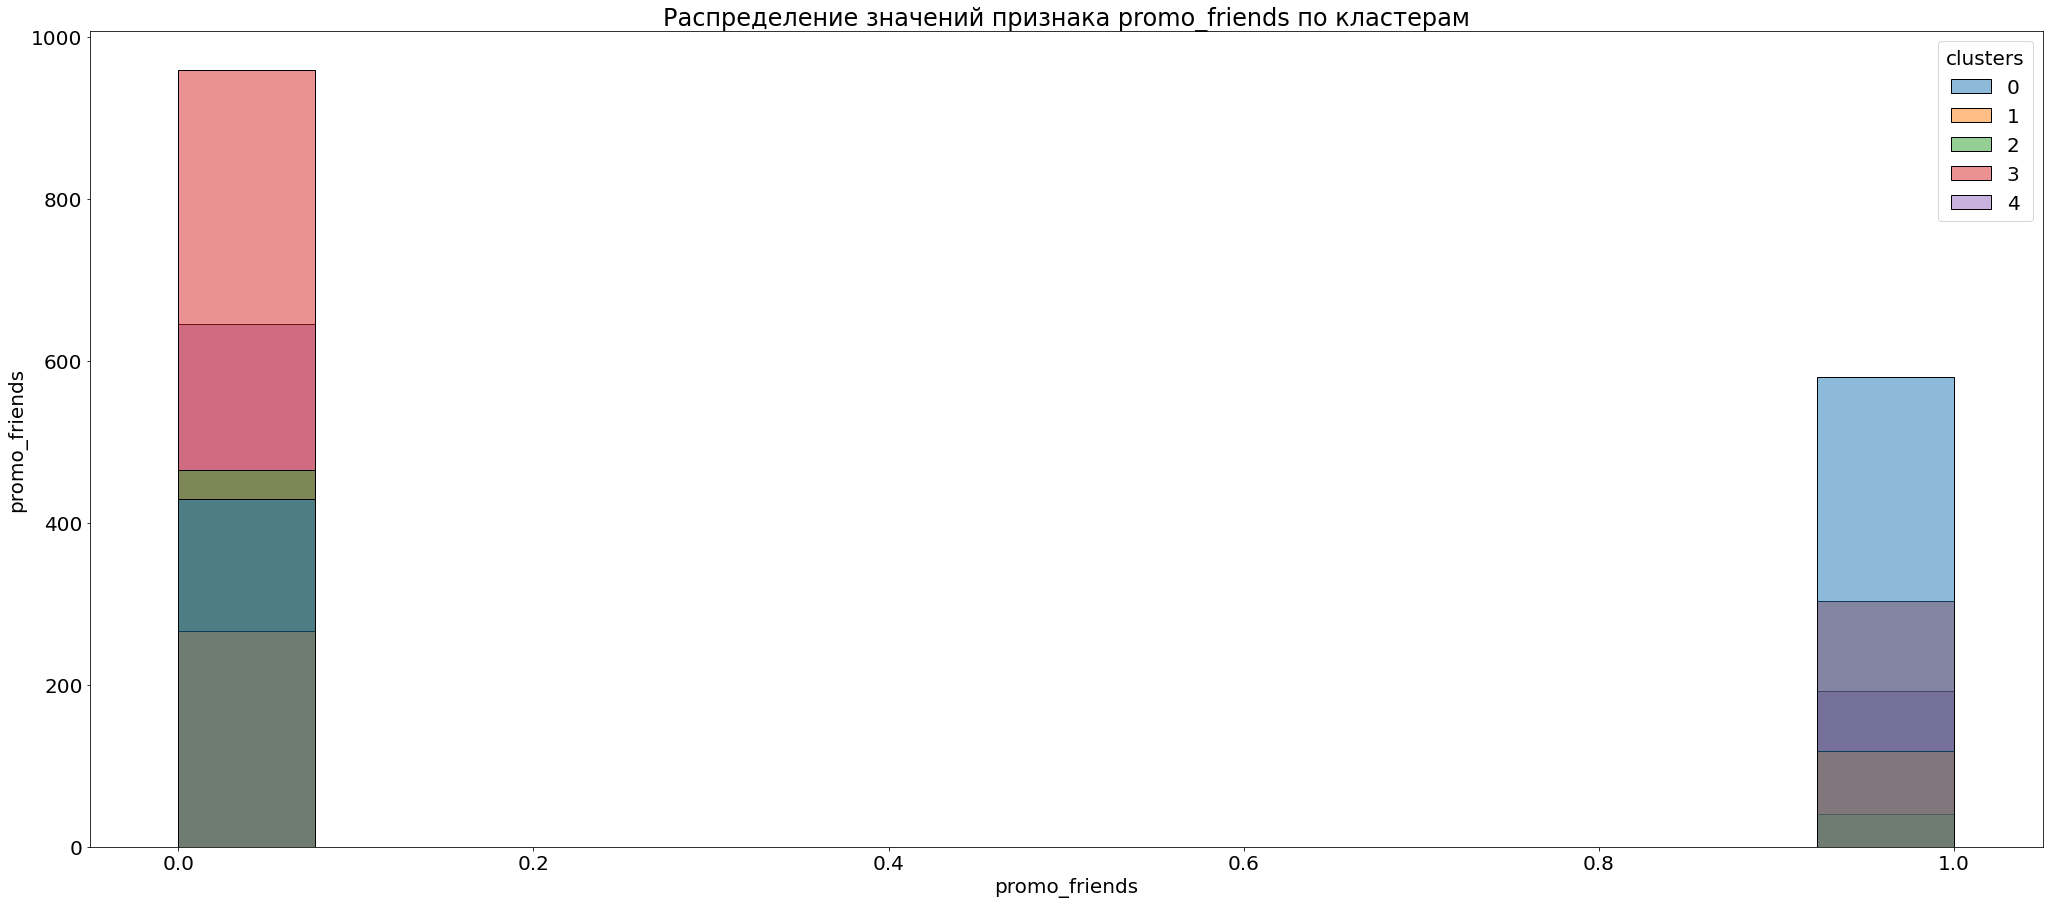

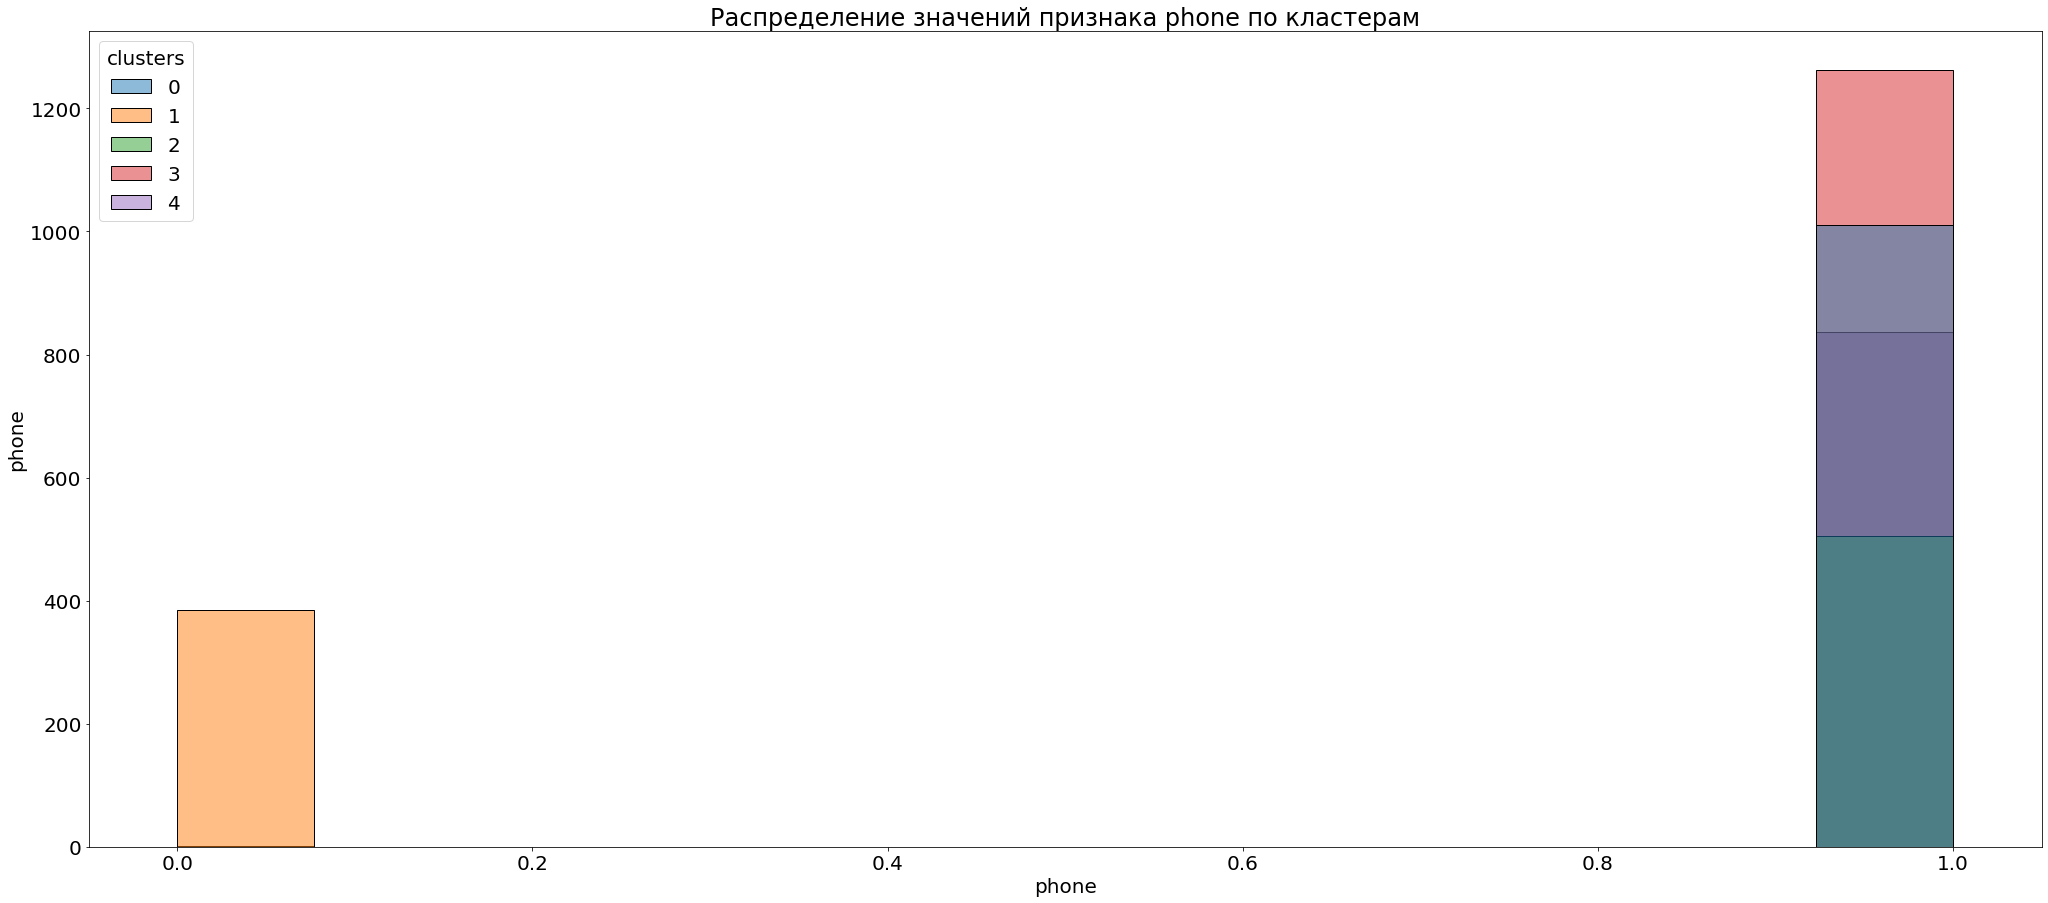

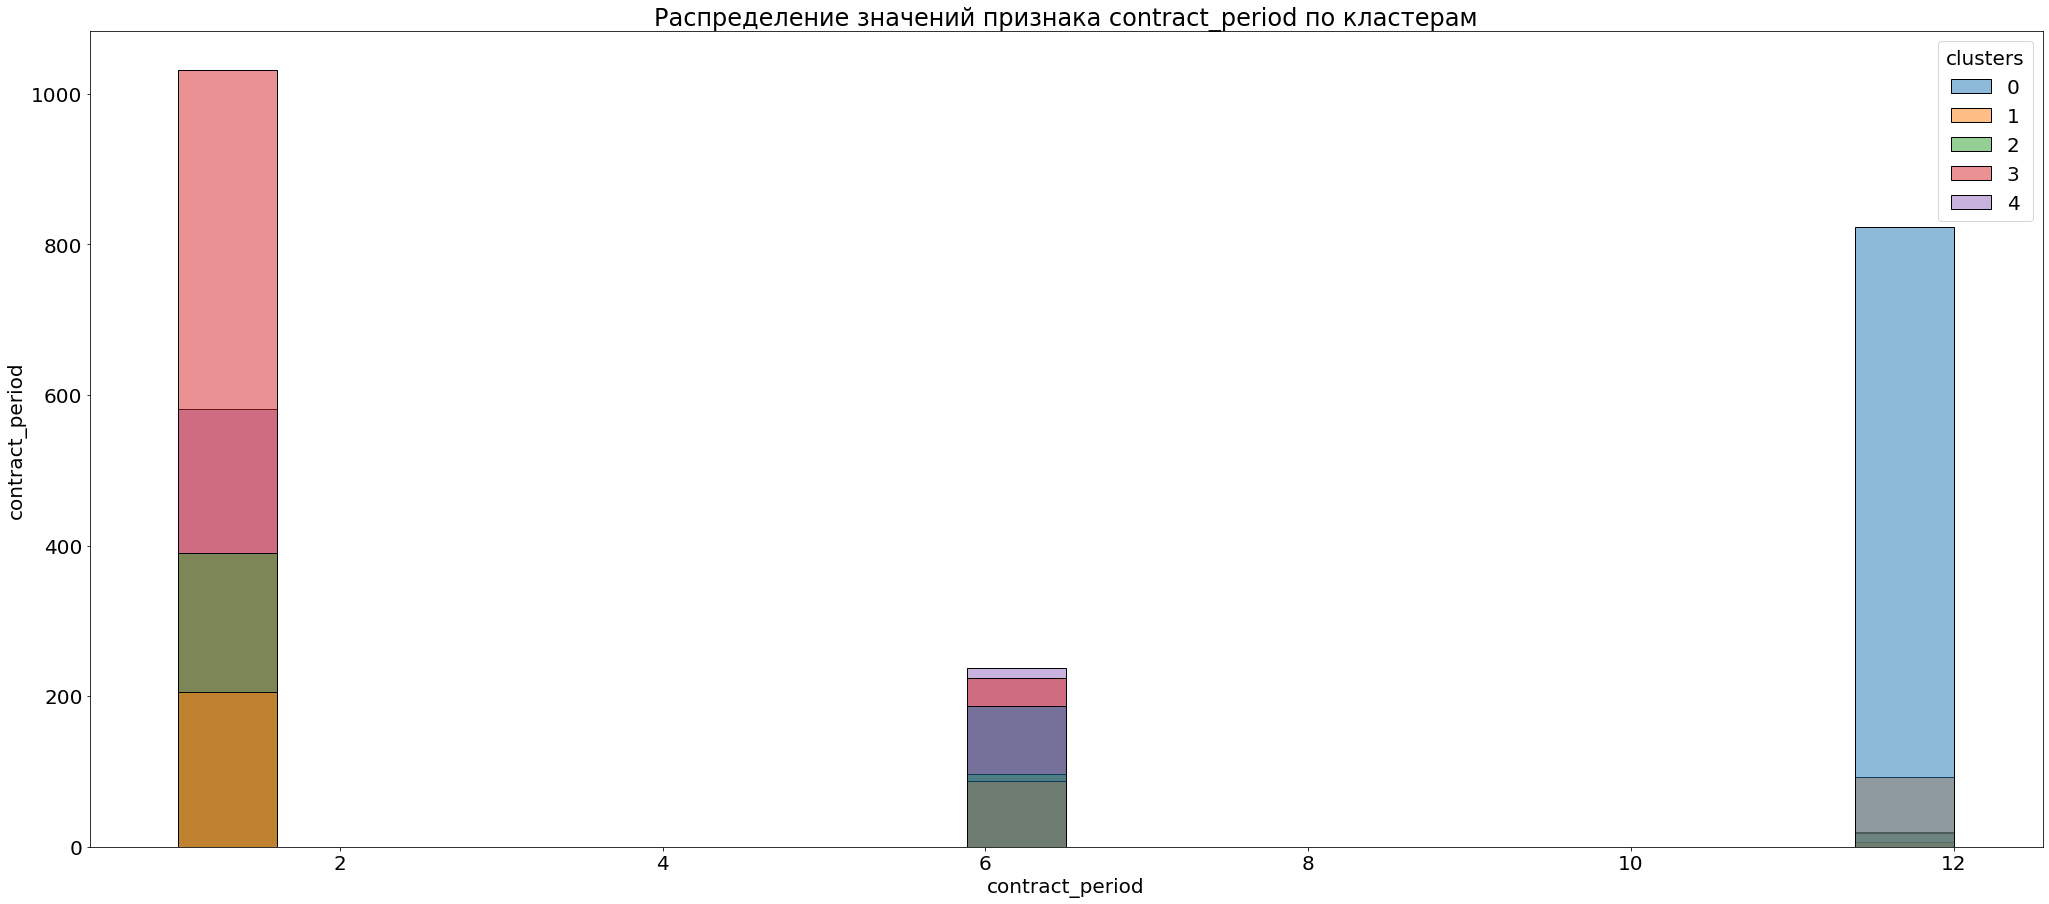

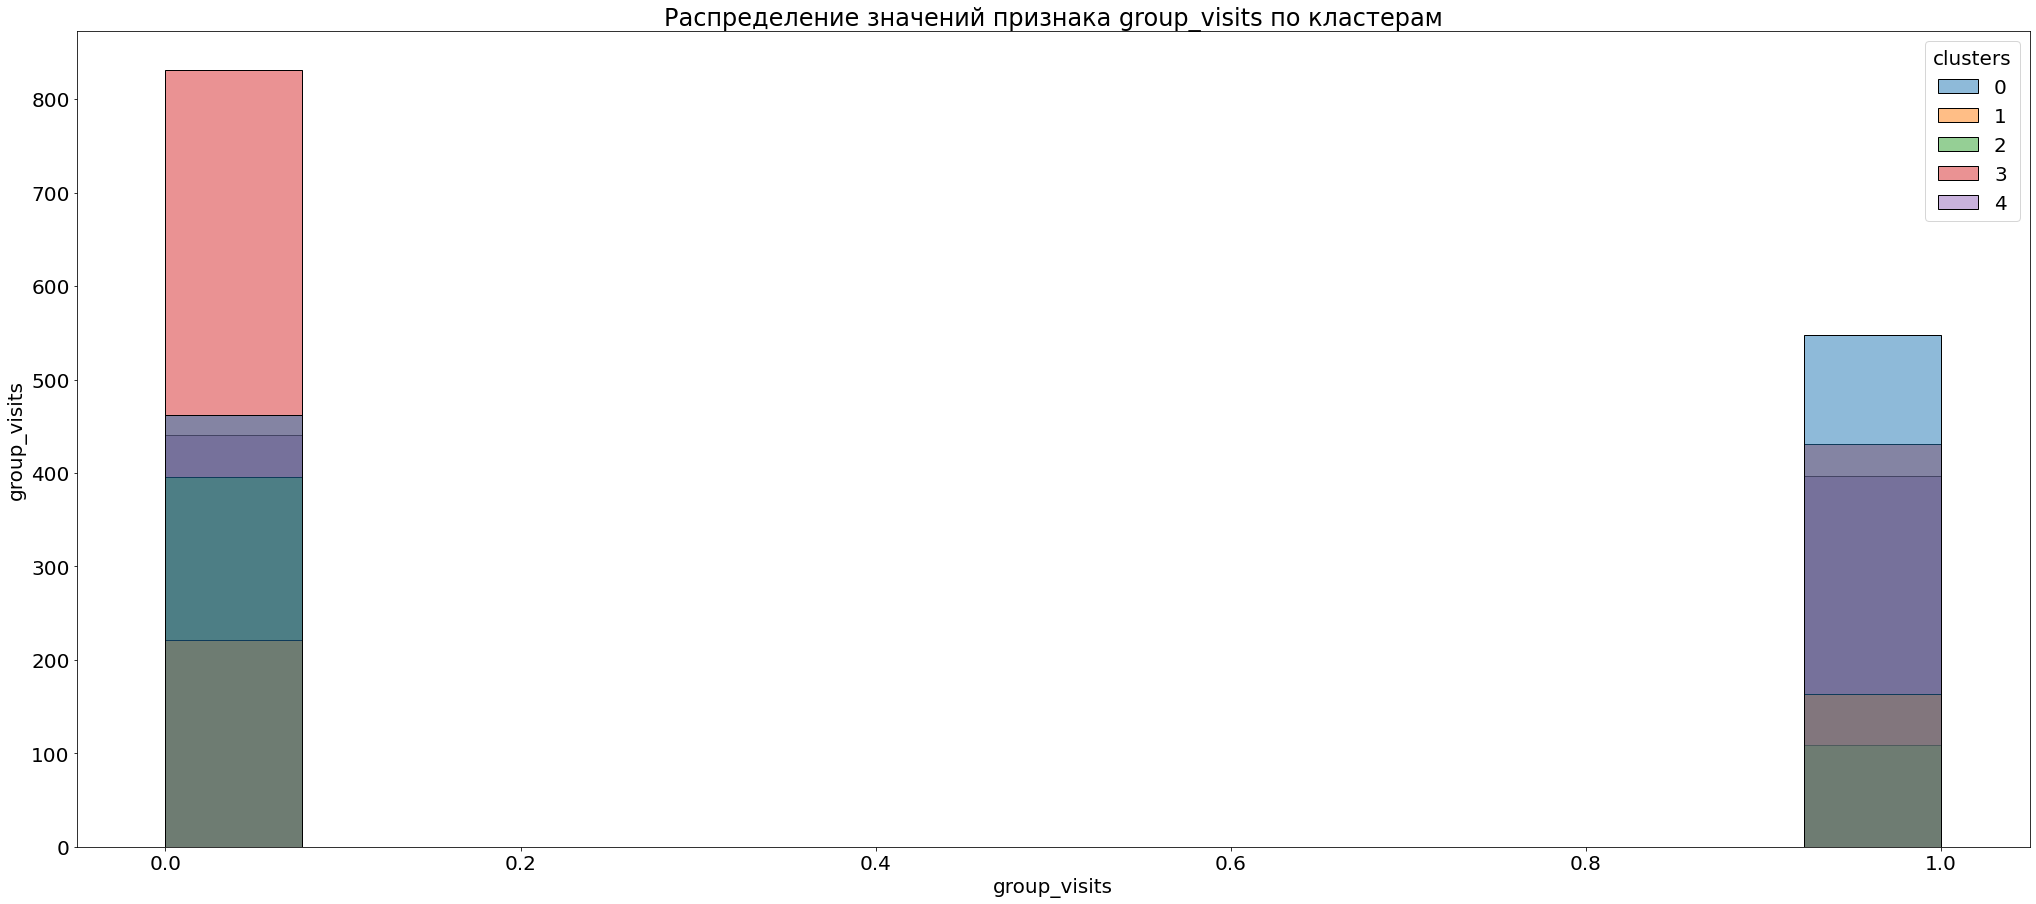

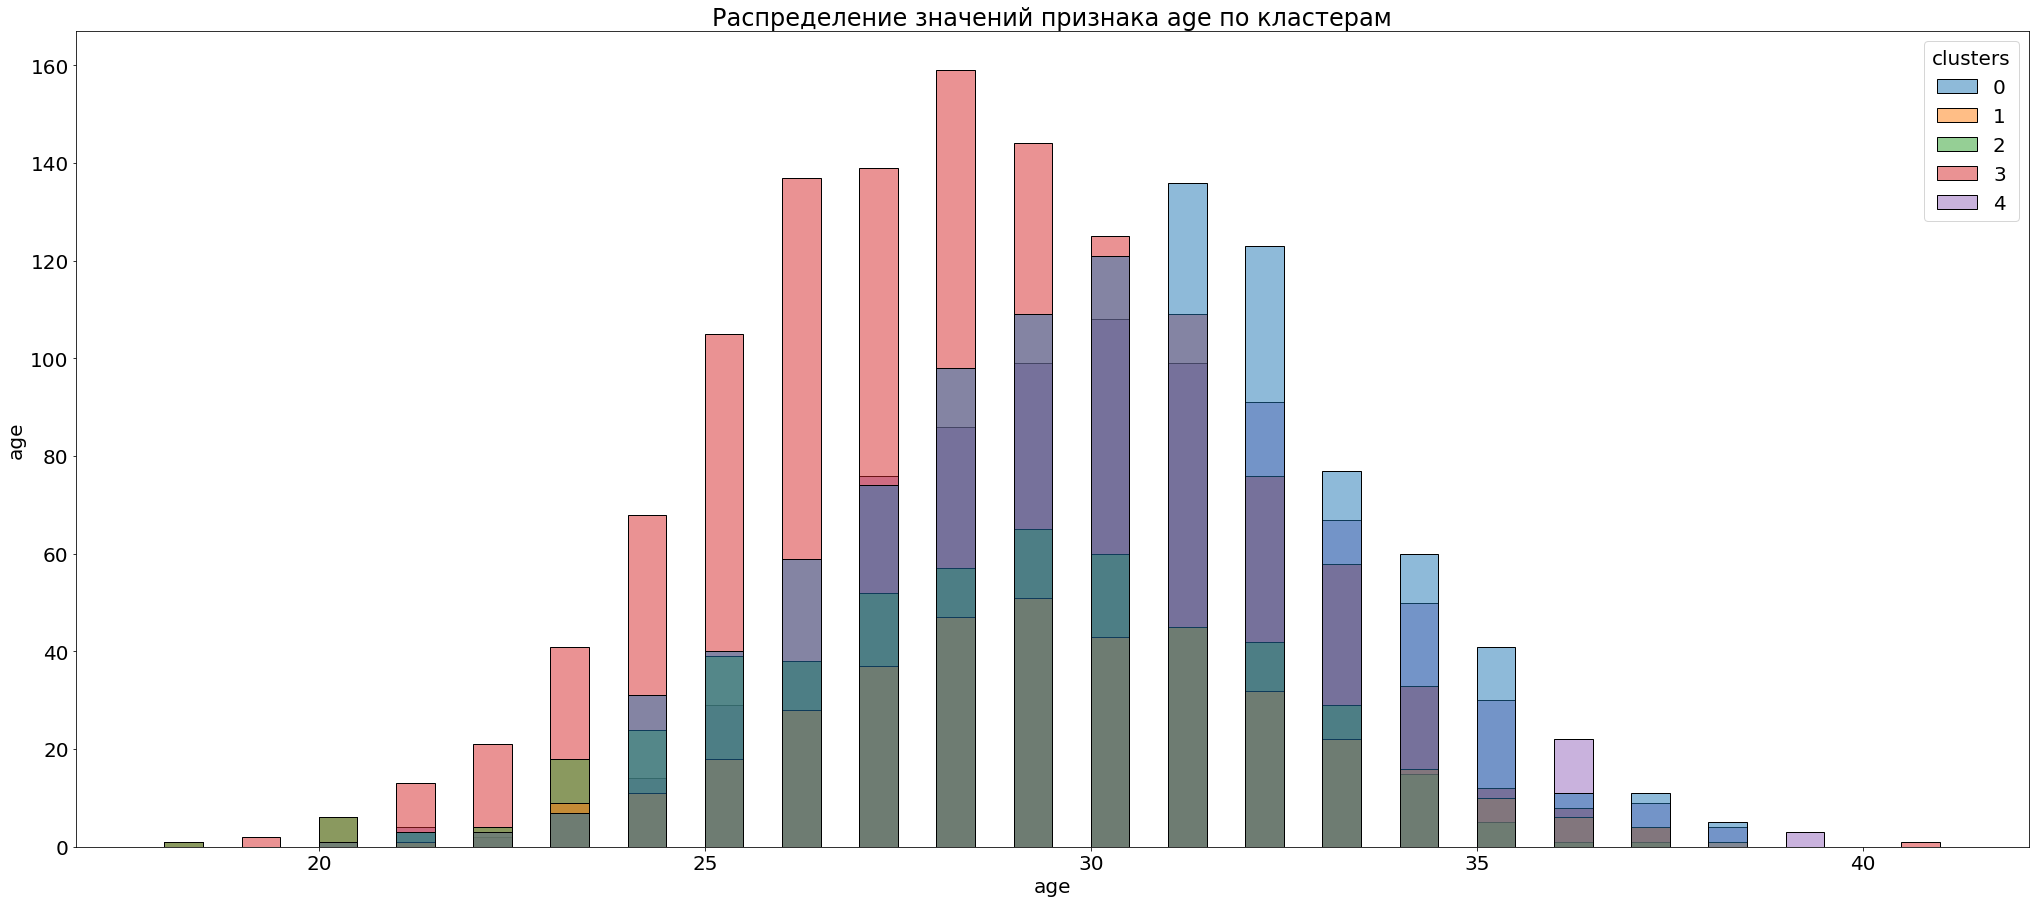

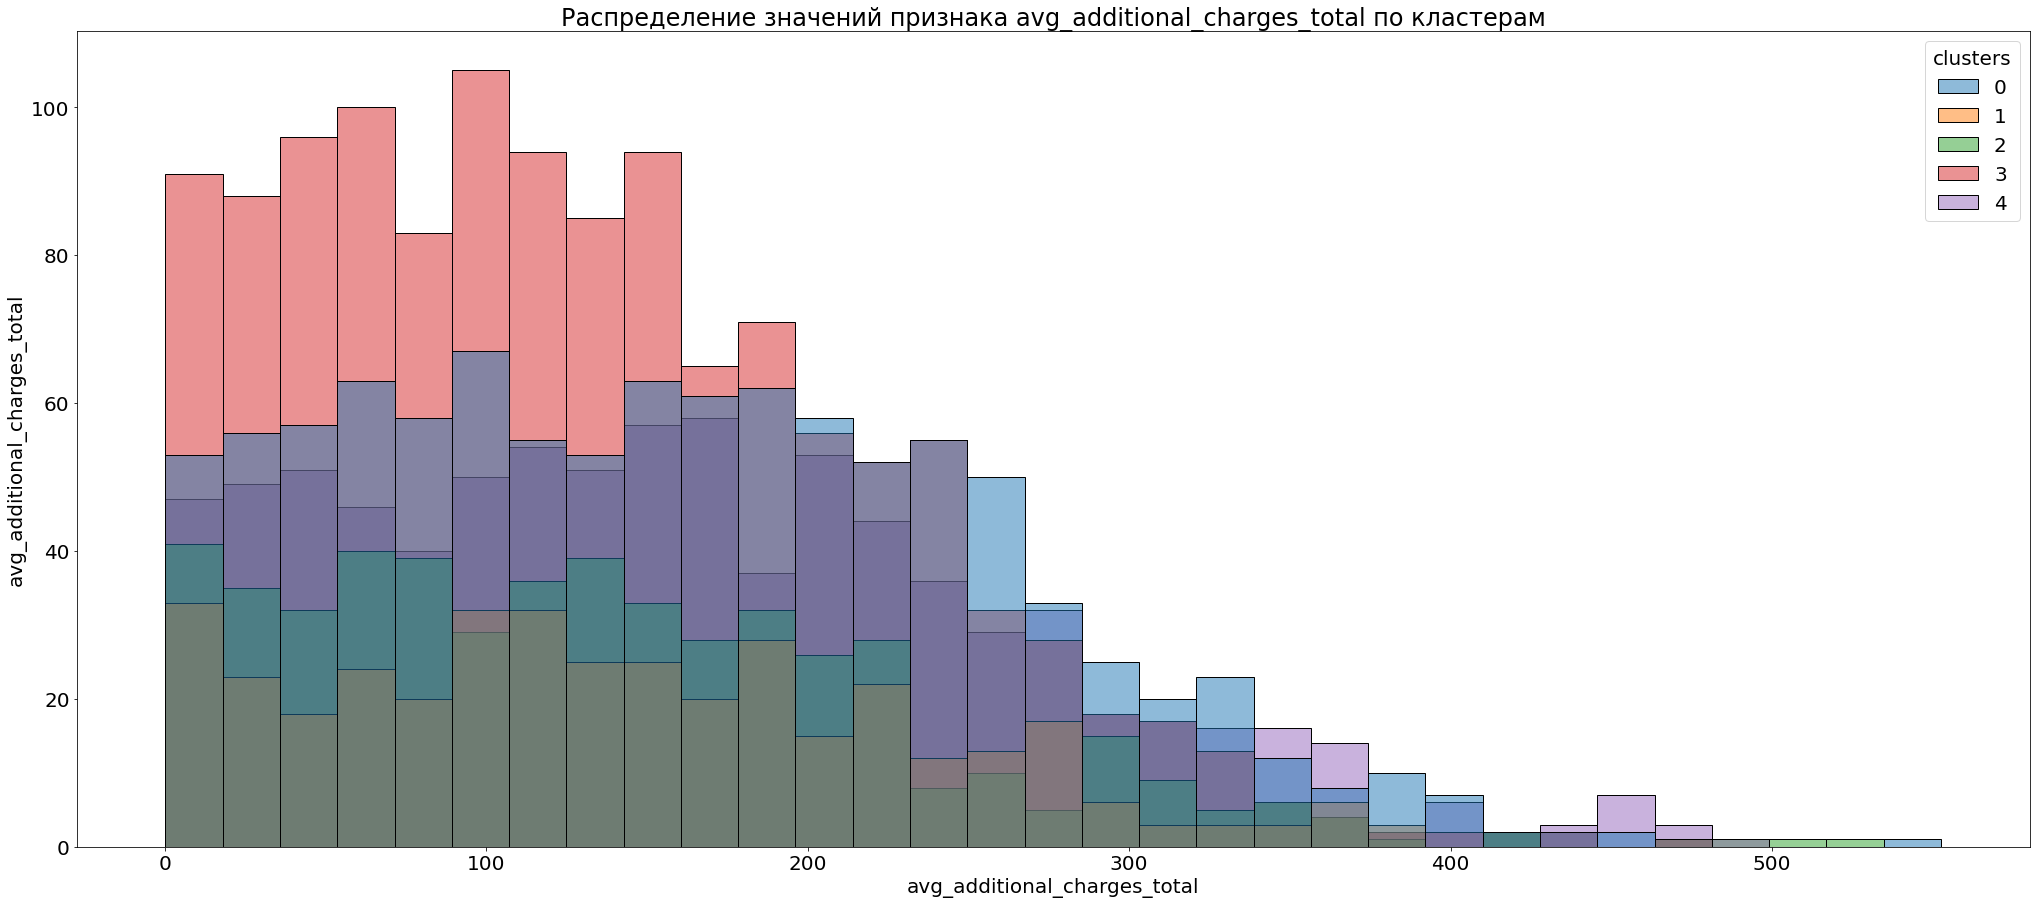

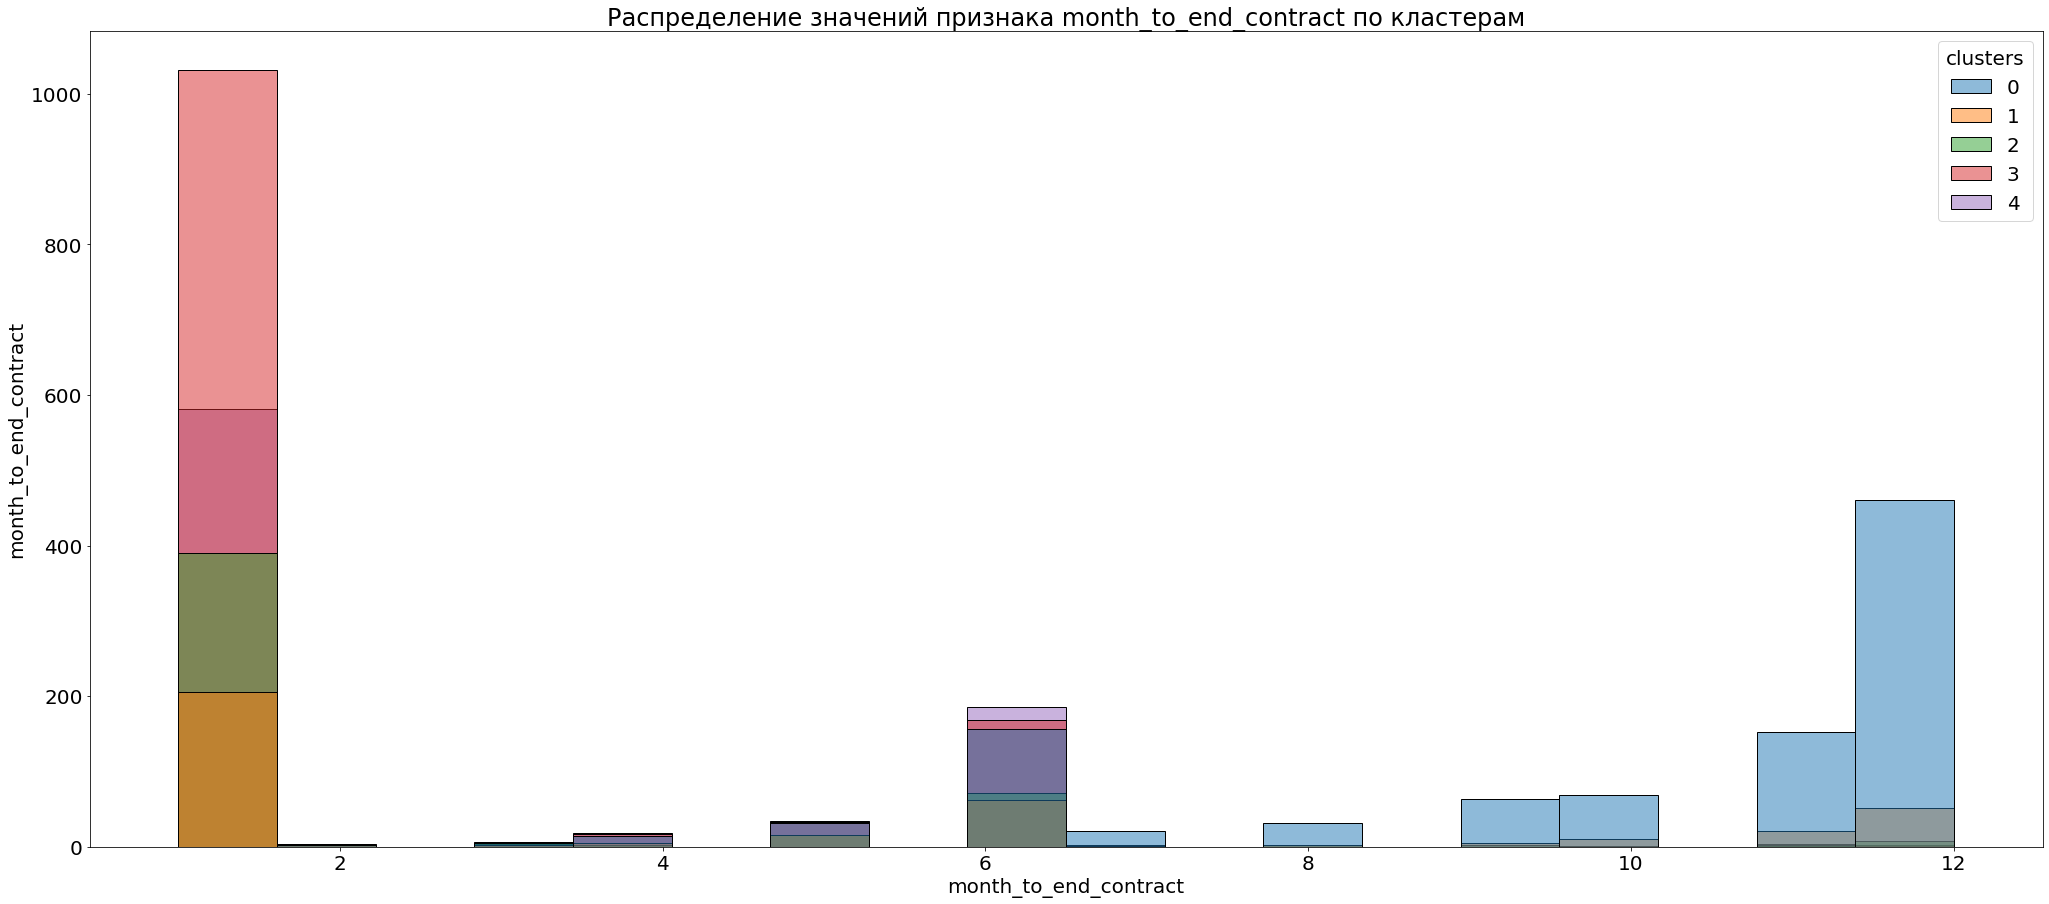

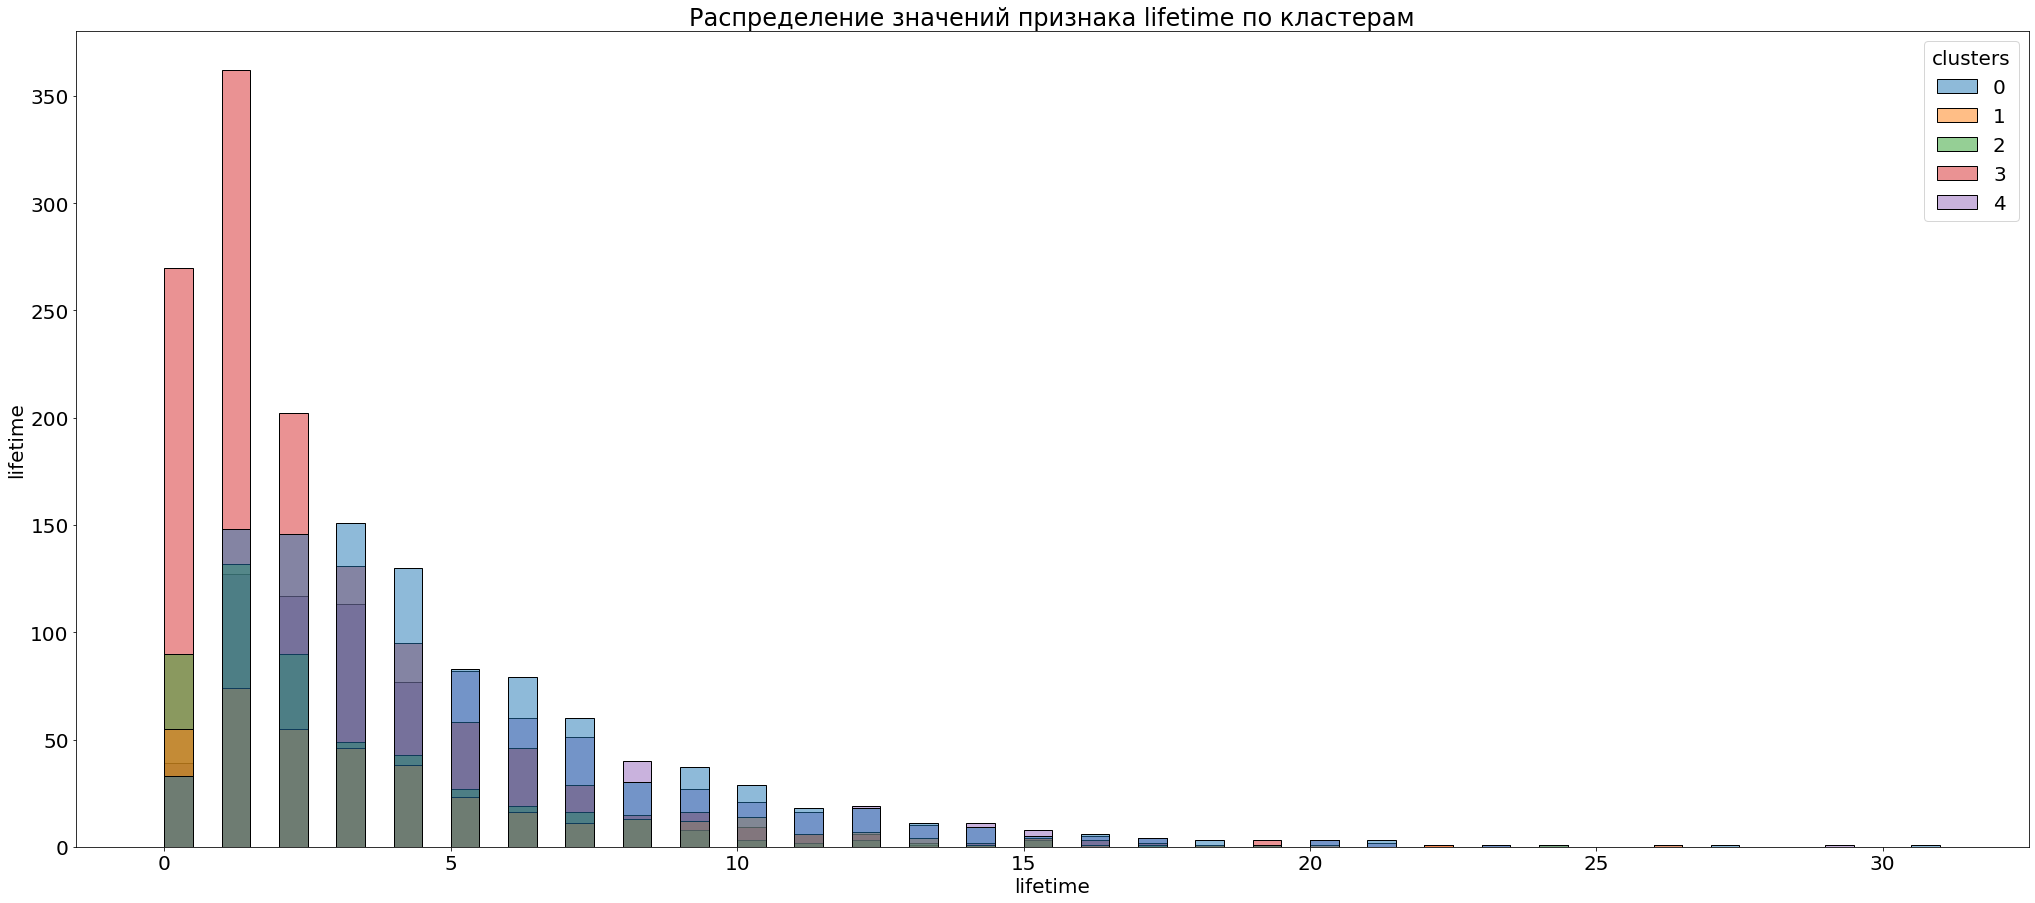

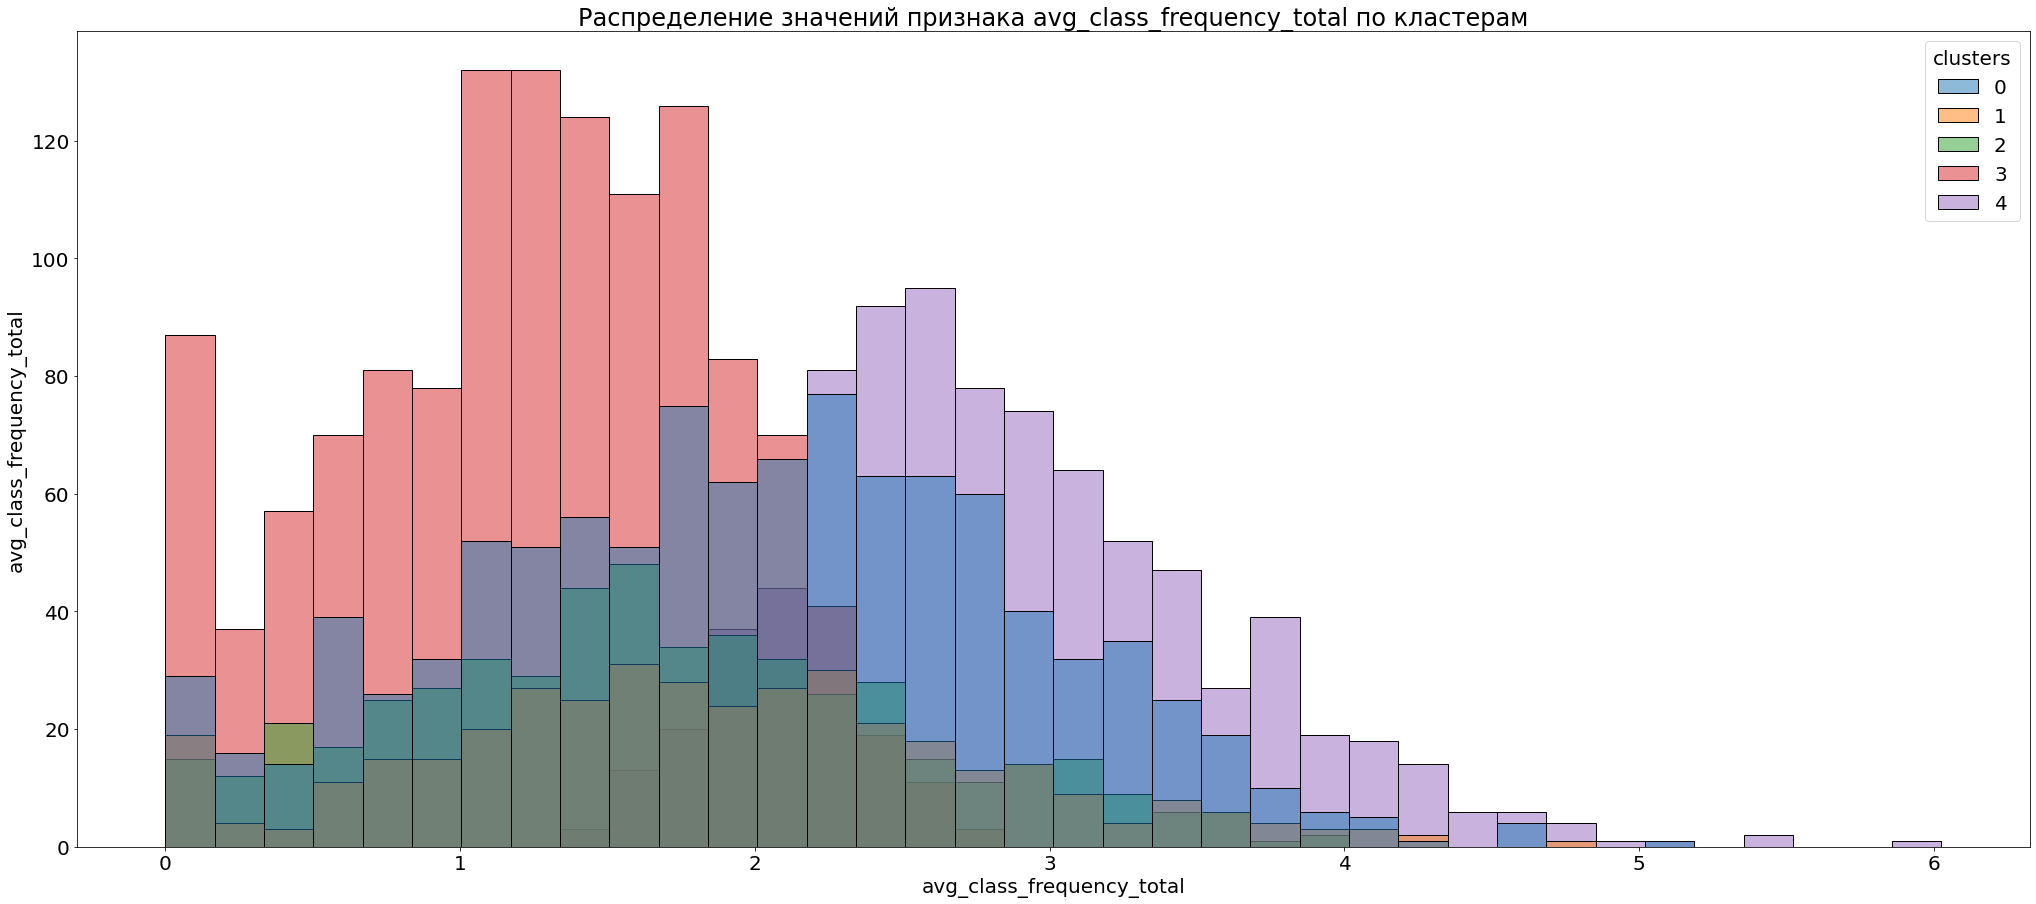

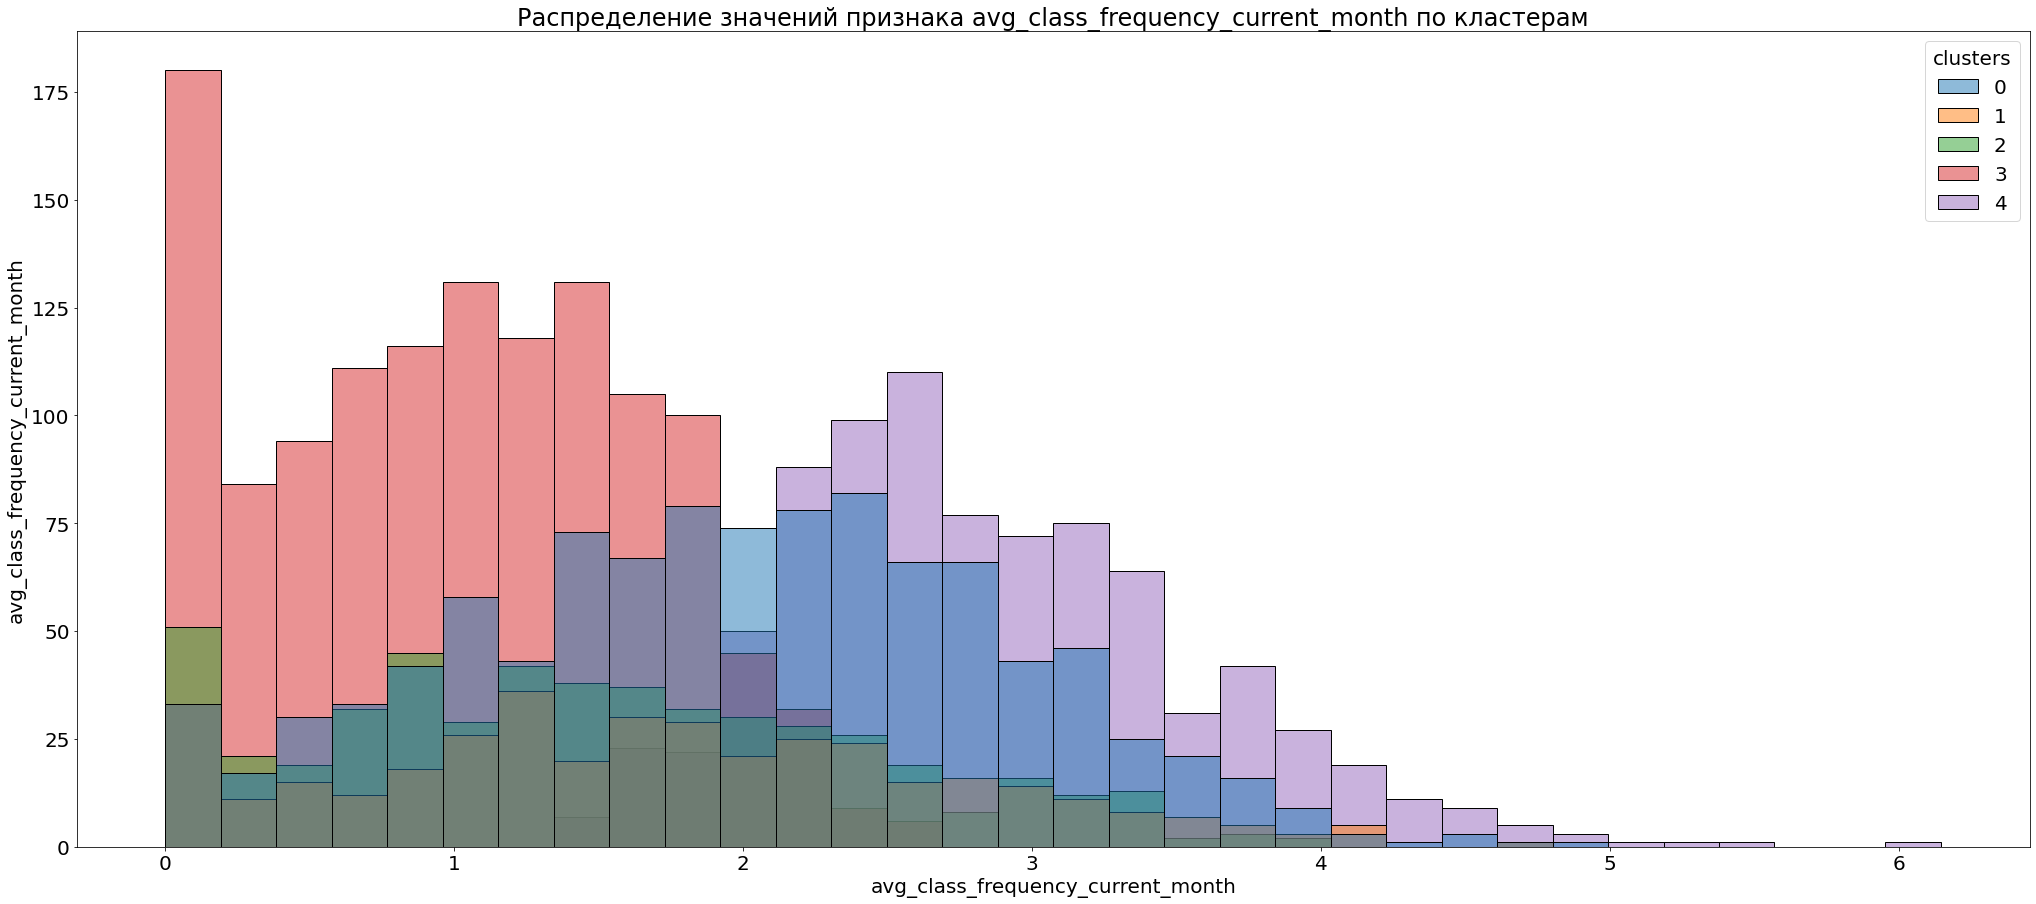

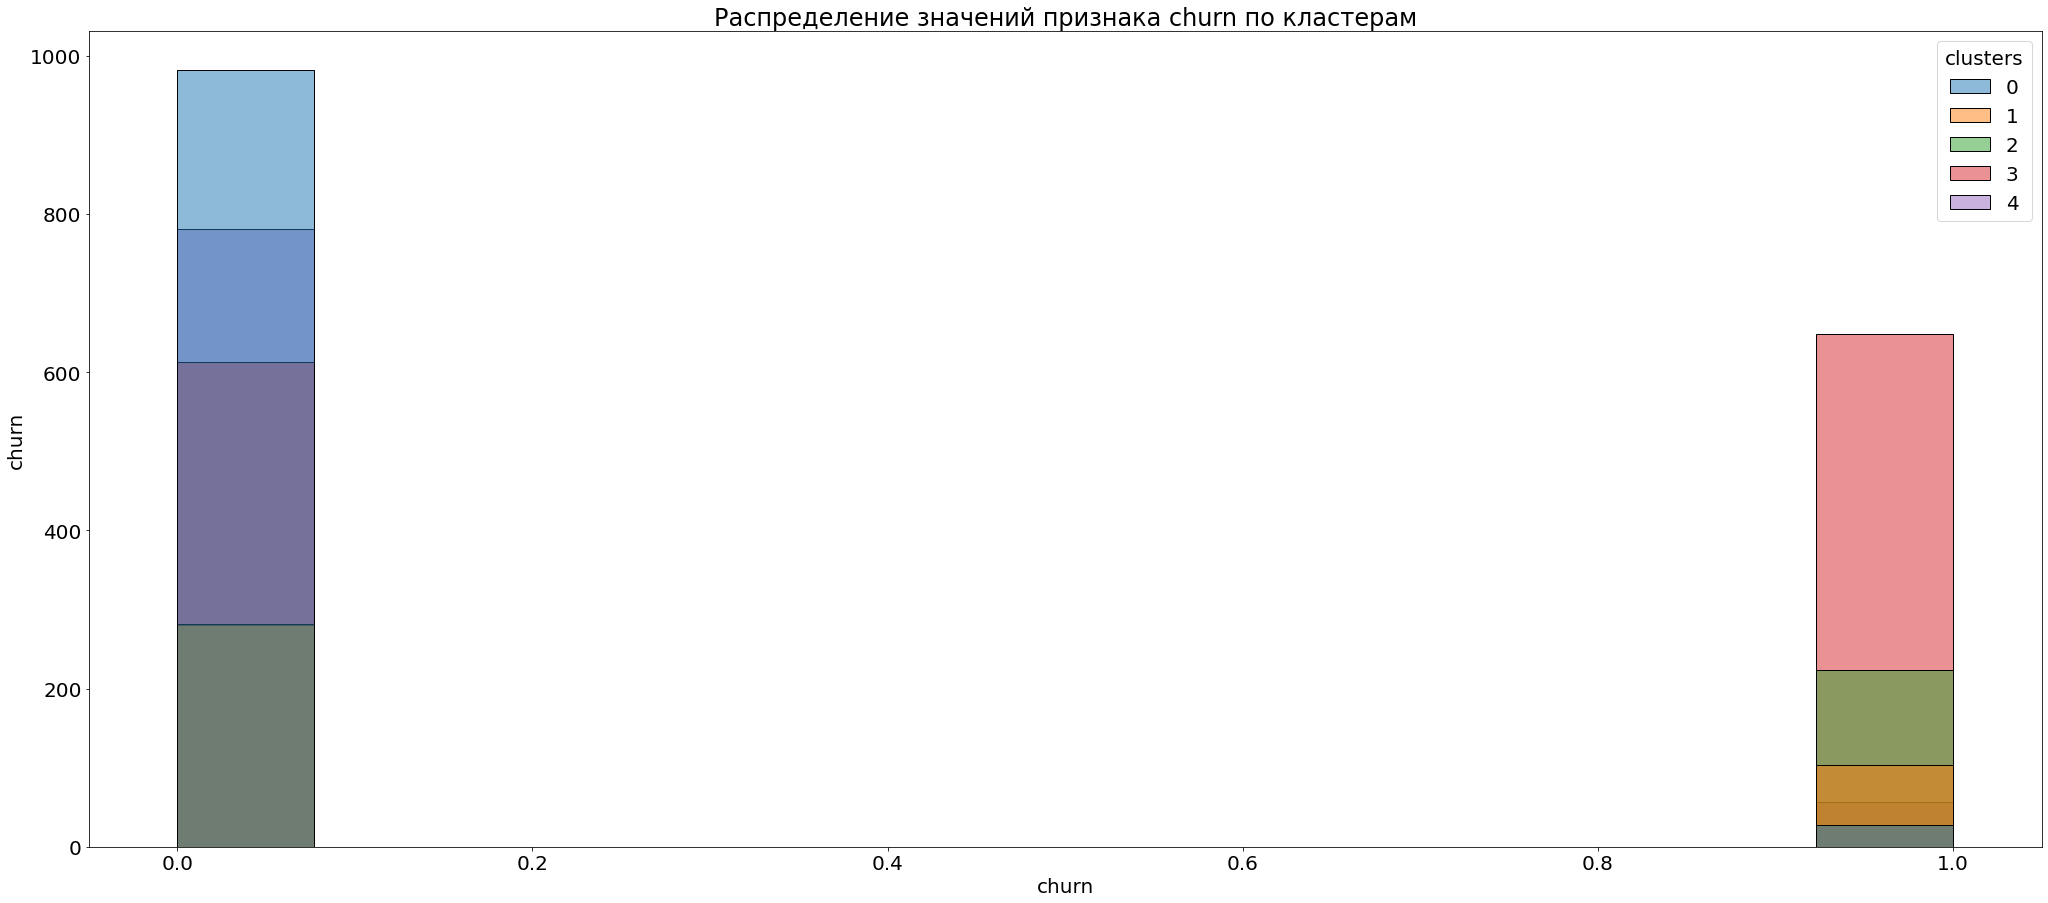

In [28]:
for i in fitness_data.columns[:-1]:
    plt.figure(figsize=(35, 15))
    plt.rcParams['font.size'] = '20'
    sbn.histplot(x=i, hue='clusters', data=fitness_data, palette="tab10")
    plt.title(f'Распределение значений признака {i} по кластерам')
    plt.ylabel(f'{i}')
    plt.show()

признак gender - заметных связей нет

признак near_location - те кто живет неблизко от клуба, кластер 2. Остальные признаки почти полностью входят в группу близко от клуба

признак partner - кластер 2 и 3 точно нет в программе партнер, остальные есть с программой партнер и без 

признак promo_friends - здесь такое же соотношение кластеров как в partner

признак phone - те кто не оставил телефон все входят в кластер 1 

признак contract_period - здесь хорошо видно, что абонементы продаются на периоды 1,6,12 месяцев. Кластер 0 состоит преимущественно из 12-месячных абонементов, и в нем нет тех у кого абонементов 1 мес и почти нет 6 месяцев

признак group_visits - в кластере 3 точно нет любителей групповых занятий. Остальные кластеры присутствуют в группе любителей групповых занятий и тех тех кто не любит

признак age - кластер 3 преимущественно состоит из тех кому 30 лет и меньше, кластер 0 кому больше 30 лет.

признак avg_additional_charges_total - здесь также кластер 3, который тратит до 250(молодежь) и кластер 0 - тратит свыше 200(старше 30).

признак month_to_end_contract - кластеры 0 и 4, те кто покупают абонемент на год, остальные меньше 2 месяцев и 2 месяца

признак lifetime - кластеры 0 и 4, те кто долго ходят в фитнесс-клуб. 3, 2 и немного 0, 1, 4, те кто ходили в клуб не больше 2 месяцев

признак avg_class_frequency_total - кластер 3, те кто ходит в среднем 1 раз, кластер 0 - те кто ходит 2-3 раза.

признак avg_class_frequency_current_month -  здесь такое же соотношение кластеров как в avg_class_frequency_total

### Доля оттока по кластерам 

In [29]:
outflow_parts = fitness_data.query('churn==1').groupby('clusters')['churn'].count() / len(fitness_data)
outflow_parts


clusters
0    0.00700
1    0.02575
2    0.05600
3    0.16225
4    0.01425
Name: churn, dtype: float64

In [30]:
#Нарисуем круговую диаграмму оттока по кластерам
fig = go.Figure(data=[go.Pie(labels=outflow_parts.index, values=outflow_parts.values)])
fig.update_layout(title_text='Доля оттока клиентов по кластерам')
fig.show()

Доля оттока клиентов для каждого кластера разная. Больше всего уходят клиенты из 3 кластера, 16.2% от общего числа посетителей в кластере. Самые надежные кластеры 0, 1 и 4, здесь меньше всего отток.  

## Общие выводы

Провели анализ оттока клиентов в фитнесс-клубе. Использовали для этого модели машинного обучения с учителем "Логистическая регрессия" и "Случайный лес". Обе модели одинаково показали хорошие результыты. Оценка качества модели accuracy показала даже 93%, это высокий результат. 

Так же использовали методы машинного обучения без учителя, кластеризация клиентов, при помощи иерархичсекой кластеризации и метода к-средних. Оценка качества модели показала не очень высокий результат 0,13 (максимальный результат когда показатель стремится к 1). Анализ показал, что для успешной работы фитнесс-клубе необходимо использовать следующие рекомендации:

1)привлекать клиентов предлагая партнерские программы и промо-акции
2)использовать более выгодные цены на абонементы за 6 и 12 месяцев
3)создавать приятную, притягивающую атмосферу, чтобы клиенты ходили чаще 2-3 раза в неделю
4)больше уделять внимание людям возрастом 28 лет и старше, это потенциально надежные клиенты.